# Enhancing Efficiency and Minimizing Delays: A Comparative Study of Machine Learning Models for Forecasting Average Gate Arrival Delays at Newark Liberty International Airport

**S. Carmona, R. Koutike, S. Meda, K. Shah, A. Varsada**



#Importing Libraries

In [ ]:
%%capture
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import os
from datetime import datetime
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

<ipython-input-2-ce206fda8f3d>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Importing Data

The following code comes from an [article](https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a) Sebastian Carmona wrote on Medium. 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Spring_2023/Data_602/Project/Data

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Spring_2023/Data_602/Project/Data


#Appending Delay files

You can found the [Data Dictionary](https://aspm.faa.gov/aspmhelp/index/ASPM_Airport_Analysis__Definitions_of_Variables.html) for Airport Analysis files

In [ ]:
delays = []
headers=["Date","Hour","Scheduled Departures","Scheduled Arrivals",
         "Departures For Metric Computation","Arrivals For Metric Computation",
         "% On-Time Gate Departures","% On-Time Airport Departures","% On-Time Gate Arrivals",
         "Average Gate Departure Delay","Average Taxi Out Time","Average Taxi Out Delay",
         "Average Airport Departure Delay","Average Airborne Delay","Average Taxi In Delay",
         "Average Block Delay","Average Gate Arrival Delay"]
path = 'Delays'
for file in os.listdir(path):
  if file.endswith('.xlsx'):    
    df = pd.read_excel(path+'/'+file, skipfooter=5,skiprows=1,names=headers)
    
    delays.append(df)

delays_df = pd.concat(delays, axis=0, ignore_index=True)
delays_df

Date  Hour  Scheduled Departures  Scheduled Arrivals  \
0      2018-01-01 00:00:00     0                     0                  15   
1      2018-01-01 00:00:00     1                     1                   3   
2      2018-01-01 00:00:00     2                     0                   2   
3      2018-01-01 00:00:00     3                     0                   0   
4      2018-01-01 00:00:00     4                     0                   4   
...                    ...   ...                   ...                 ...   
41879  2022-11-30 00:00:00    19                    35                  39   
41880  2022-11-30 00:00:00    20                    33                  32   
41881  2022-11-30 00:00:00    21                    30                  26   
41882  2022-11-30 00:00:00    22                     5                  16   
41883  2022-11-30 00:00:00    23                     4                  19   

       Departures For Metric Computation  Arrivals For Metric Computation  \
0                                      0                                9   
1                                      1                                0   
2                                      0                                1   
3                                      0                                0   
4                                      0                                1   
...                                  ...                              ...   
41879                                 30                               31   
41880                                 25                               24   
41881                                 27                               20   
41882                                 12                               17   
41883                                  8                               25   

       % On-Time Gate Departures  % On-Time Airport Departures  \
0                           0.00                          0.00   
1                         100.00                        100.00   
2                           0.00                          0.00   
3                           0.00                          0.00   
4                           0.00                          0.00   
...                          ...                           ...   
41879                      46.67                         23.33   
41880                      28.00                         24.00   
41881                      48.15                         51.85   
41882                      41.67                         41.67   
41883                      12.50                         12.50   

       % On-Time Gate Arrivals  Average Gate Departure Delay  \
0                        55.56                          0.00   
1                         0.00                          8.00   
2                         0.00                          0.00   
3                         0.00                          0.00   
4                       100.00                          0.00   
...                        ...                           ...   
41879                    22.58                         51.87   
41880                    29.17                         63.48   
41881                    45.00                         60.85   
41882                    35.29                         21.17   
41883                    56.00                         42.38   

       Average Taxi Out Time  Average Taxi Out Delay  \
0                       0.00                    0.00   
1                      18.00                    5.40   
2                       0.00                    0.00   
3                       0.00                    0.00   
4                       0.00                    0.00   
...                      ...                     ...   
41879                  24.03                   11.10   
41880                  18.56                    6.06   
41881                  17.63                    5.06   
41882                  15.92          

#Appending Weather files


In [ ]:
weather = []
headers=["Facility", "Date","Local Hour","GMT Hour","Departures For Efficiency Computation",
         "Arrivals For Efficiency Computation","Total For Efficiency Computation",
         "Weather","Ceiling(100) Feet","Visibility (Statue Miles)","Temp(F)",
         "Wind Angle","Wind Speed (Knots)","Airport Weather","Runway","ADR",
         "Capacity AAR","ADR+ Capacity AAR","Efficiency AAR"]
path = 'Weather'
for file in os.listdir(path):
  if file.endswith('.xlsx'):    
    df = pd.read_excel(path+'/'+file, skipfooter=5,skiprows=2,names=headers)

    weather.append(df)

weather_df = pd.concat(weather, axis=0, ignore_index=True)
weather_df

Facility                 Date  Local Hour  GMT Hour  \
0          EWR  2022-01-01 00:00:00           1         6   
1          EWR  2022-01-01 00:00:00           2         7   
2          EWR  2022-01-01 00:00:00           3         8   
3          EWR  2022-01-01 00:00:00           4         9   
4          EWR  2022-01-01 00:00:00           5        10   
...        ...                  ...         ...       ...   
43814      EWR  2018-12-31 00:00:00          19         0   
43815      EWR  2018-12-31 00:00:00          20         1   
43816      EWR  2018-12-31 00:00:00          21         2   
43817      EWR  2018-12-31 00:00:00          22         3   
43818      EWR  2018-12-31 00:00:00          23         4   

       Departures For Efficiency Computation  \
0                                          2   
1                                          0   
2                                          1   
3                                          0   
4                                          4   
...                                      ...   
43814                                     33   
43815                                     12   
43816                                     17   
43817                                     12   
43818                                      7   

       Arrivals For Efficiency Computation  Total For Efficiency Computation  \
0                                        3                                 5   
1                                        0                                 0   
2                                        1                                 2   
3                                        2                                 2   
4                                        7                                11   
...                                    ...                               ...   
43814                                   24                                57   
43815                                   20                                32   
43816                                   10                                27   
43817                                   14                                26   
43818                                   11                                18   

      Weather  Ceiling(100) Feet  Visibility (Statue Miles)  Temp(F)  \
0         IMC                  5                        4.0     50.0   
1         IMC                  5                        5.0     50.0   
2         IMC                  5                        5.0     50.0   
3         IMC                  5                        5.0     50.0   
4         IMC                  4                        3.0     48.0   
...       ...                ...                        ...      ...   
43814     IMC                  6                        3.0     44.0   
43815     IMC                  6                        3.0     44.0   
43816     IMC                  6                        3.0     44.0   
43817     IMC                  5                        3.0     44.0   
43818     IMC                  4                        3.0     46.0   

      Wind Angle  Wind Speed (Knots) Airport Weather     Runway  ADR  \
0            140                 4.0              BR  22L | 22R   32   
1              0                 0.0          -RA BR  22L | 22R   32   
2            160                 5.0          -RA BR  22L | 22R   32   
3            160                 5.0          -RA BR  22L | 22R   32   
4              0                 0.0          -RA BR  22L | 22R   32   
...          ...                 ...             ...        ...  ...   
43814        120                11.0          -RA BR  22L | 22R   42   
43815        120                11.0          -RA BR  22L | 22R   42   
43816        120                 7.0          +RA BR  22L | 22R   42   
43817        140                 3.0          +RA BR  22L | 22R   42   
43818         70                 3.0           RA BR  22L | 22R   42   

     

# Weather Profiling & EDA

In [ ]:
display(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43819 entries, 0 to 43818
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Facility                               43819 non-null  object 
 1   Date                                   43819 non-null  object 
 2   Local Hour                             43819 non-null  int64  
 3   GMT Hour                               43819 non-null  int64  
 4   Departures For Efficiency Computation  43819 non-null  int64  
 5   Arrivals For Efficiency Computation    43819 non-null  int64  
 6   Total For Efficiency Computation       43819 non-null  int64  
 7   Weather                                43819 non-null  object 
 8   Ceiling(100) Feet                      43819 non-null  int64  
 9   Visibility (Statue Miles)              43819 non-null  float64
 10  Temp(F)                                40231 non-null  float64
 11  Wi

None

In [ ]:
profile = ProfileReport(weather_df, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Delays Profiling & EDA

In [ ]:
display(delays_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               41884 non-null  object 
 1   Hour                               41884 non-null  int64  
 2   Scheduled Departures               41884 non-null  int64  
 3   Scheduled Arrivals                 41884 non-null  int64  
 4   Departures For Metric Computation  41884 non-null  int64  
 5   Arrivals For Metric Computation    41884 non-null  int64  
 6   % On-Time Gate Departures          41884 non-null  float64
 7   % On-Time Airport Departures       41884 non-null  float64
 8   % On-Time Gate Arrivals            41884 non-null  float64
 9   Average Gate Departure Delay       41884 non-null  float64
 10  Average Taxi Out Time              41884 non-null  float64
 11  Average Taxi Out Delay             41884 non-null  flo

None

In [ ]:
profile = ProfileReport(delays_df, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
delays_df.columns

Index(['Date', 'Hour', 'Scheduled Departures', 'Scheduled Arrivals',
       'Departures For Metric Computation', 'Arrivals For Metric Computation',
       '% On-Time Gate Departures', '% On-Time Airport Departures',
       '% On-Time Gate Arrivals', 'Average Gate Departure Delay',
       'Average Taxi Out Time', 'Average Taxi Out Delay',
       'Average Airport Departure Delay', 'Average Airborne Delay',
       'Average Taxi In Delay', 'Average Block Delay',
       'Average Gate Arrival Delay'],
      dtype='object')

In [ ]:
weather_df.columns

Index(['Facility', 'Date', 'Local Hour', 'GMT Hour',
       'Departures For Efficiency Computation',
       'Arrivals For Efficiency Computation',
       'Total For Efficiency Computation', 'Weather', 'Ceiling(100) Feet',
       'Visibility (Statue Miles)', 'Temp(F)', 'Wind Angle',
       'Wind Speed (Knots)', 'Airport Weather', 'Runway', 'ADR',
       'Capacity AAR', 'ADR+ Capacity AAR', 'Efficiency AAR'],
      dtype='object')

In [ ]:
weather_df = weather_df.rename(columns={'Local Hour':'Hour'})
len(weather_df.columns)

19

# Joining Datasets

In [ ]:
df = delays_df.merge(weather_df, on=['Date','Hour'], how='inner')
df

Date  Hour  Scheduled Departures  Scheduled Arrivals  \
0      2018-01-01 00:00:00     1                     1                   3   
1      2018-01-01 00:00:00     2                     0                   2   
2      2018-01-01 00:00:00     3                     0                   0   
3      2018-01-01 00:00:00     4                     0                   4   
4      2018-01-01 00:00:00     5                     6                  12   
...                    ...   ...                   ...                 ...   
41868  2022-11-30 00:00:00    19                    35                  39   
41869  2022-11-30 00:00:00    20                    33                  32   
41870  2022-11-30 00:00:00    21                    30                  26   
41871  2022-11-30 00:00:00    22                     5                  16   
41872  2022-11-30 00:00:00    23                     4                  19   

       Departures For Metric Computation  Arrivals For Metric Computation  \
0                                      1                                0   
1                                      0                                1   
2                                      0                                0   
3                                      0                                1   
4                                      6                                7   
...                                  ...                              ...   
41868                                 30                               31   
41869                                 25                               24   
41870                                 27                               20   
41871                                 12                               17   
41872                                  8                               25   

       % On-Time Gate Departures  % On-Time Airport Departures  \
0                         100.00                        100.00   
1                           0.00                          0.00   
2                           0.00                          0.00   
3                           0.00                          0.00   
4                         100.00                         83.33   
...                          ...                           ...   
41868                      46.67                         23.33   
41869                      28.00                         24.00   
41870                      48.15                         51.85   
41871                      41.67                         41.67   
41872                      12.50                         12.50   

       % On-Time Gate Arrivals  Average Gate Departure Delay  ...  \
0                         0.00                          8.00  ...   
1                         0.00                          0.00  ...   
2                         0.00                          0.00  ...   
3                       100.00                          0.00  ...   
4                        85.71                          2.33  ...   
...                        ...                           ...  ...   
41868                    22.58                         51.87  ...   
41869                    29.17                         63.48  ...   
41870                    45.00                         60.85  ...   
41871                    35.29                         21.17  ...   
41872                    56.00                         42.38  ...   

       Visibility (Statue Miles)  Temp(F)  Wind Angle  Wind Speed (Knots)  \
0                           10.0      9.0         310                13.0   
1                           10.0      8.0         320                11.0   
2                           10.0      8.0         300                11.0   
3                           10.0      7.0         300                13.0   
4                           10.0      7.0         300                16.0   
...                          ...      ...         ...                 ...   

In [ ]:
profile = ProfileReport(df, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Some of the numerical features are skewed to the left and have 5 columns with missing values

## Time Series analysis on joined dataset

In [ ]:
hour = df.copy()
hour = hour.groupby("Hour")["Average Gate Arrival Delay"].sum()
print(hour)

Hour
0     25939.54
1     26033.82
2     13751.13
3      7127.37
4     25328.63
5     27020.57
6     26939.88
7     23465.40
8     19383.32
9     16643.27
10    17954.77
11    19643.33
12    20124.15
13    25204.45
14    32711.13
15    36100.53
16    41835.27
17    48620.95
18    57710.45
19    54264.63
20    57975.72
21    49556.62
22    47527.20
23    38250.46
Name: Average Gate Arrival Delay, dtype: float64


<Axes: xlabel='Hour'>

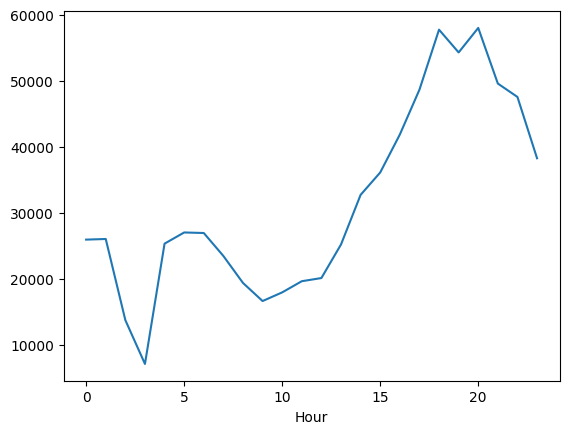

In [ ]:
hour.plot(x="Hour")

8 pm is the hour with the most amount of delay minutes

In [ ]:
df_copy = df.copy()
df_copy.Date = pd.to_datetime(df_copy["Date"])
df_copy["Date"] = df_copy["Date"].dt.to_period(freq = "M")
month_df = df_copy.groupby("Date")["Average Gate Arrival Delay"].sum()
print(month_df)

Date
2018-01    15917.13
2018-02    11587.43
2018-03    14553.37
2018-04    15895.41
2018-05    15047.92
2018-06    15410.21
2018-07    22248.75
2018-08    24980.98
2018-09    14116.29
2018-10    12411.09
2018-11    17244.27
2018-12    15122.37
2019-01    17384.37
2019-02    12734.41
2019-03    14846.16
2019-04    14965.41
2019-05    18159.02
2019-06    23239.04
2019-07    22828.65
2019-08    22734.00
2019-09    10709.32
2019-10    13985.63
2019-11    11174.11
2019-12    21763.92
2020-01    10071.74
2020-02     9774.89
2020-03     6371.50
2020-04     2718.39
2020-05     6154.44
2020-06     6320.93
2020-07     6752.74
2020-08     6500.21
2020-09     4446.51
2020-10     4417.89
2020-11     5379.59
2021-01     5662.03
2021-02    12991.98
2021-03     5541.04
2021-04     7275.86
2021-05     6912.60
2021-06    14890.88
2021-07    22669.62
2021-08    16266.02
2021-09    13043.50
2021-10     9443.13
2021-11     9625.78
2021-12    13702.34
2022-01    13773.15
2022-02    11055.95
2022-03    1419

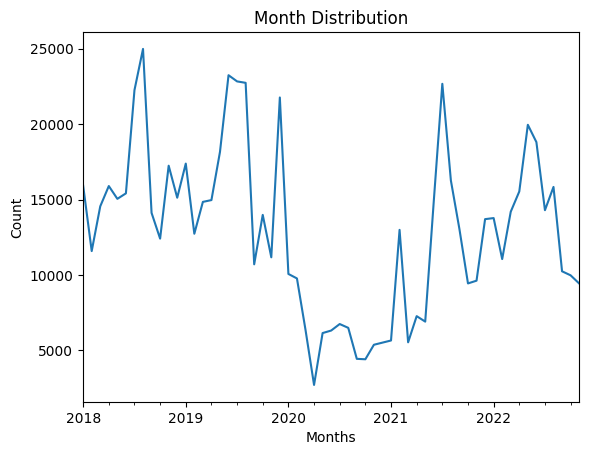

In [ ]:
month_df.plot(x="Date")
plt.title("Month Distribution")
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

We could see that 2020 reflects the pandemic where there was almost no delay arrivals, that was because the low number of flights in that year, then we could see it started to increase regularly 


In [ ]:
len(month_df[month_df < month_df.mean()])/len(month_df)

0.4827586206896552

In [ ]:
cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November','December']
df_copy = df.copy()
df_copy.Date = pd.to_datetime(df_copy["Date"])
df_copy["Date"] = df_copy['Date'].dt.month_name()
#df_copy["Date"] = df_copy['Date'].dt.strftime('%b')
month_df = df_copy.groupby("Date")["Average Gate Arrival Delay"].sum().reindex(cats) 
print(month_df)

Date
January      62808.42
February     58144.66
March        55504.99
April        56391.19
May          66227.77
June         78667.19
July         88795.40
August       86318.30
September    52562.85
October      50238.36
November     52864.83
December     50588.63
Name: Average Gate Arrival Delay, dtype: float64


Text(0, 0.5, 'Count')

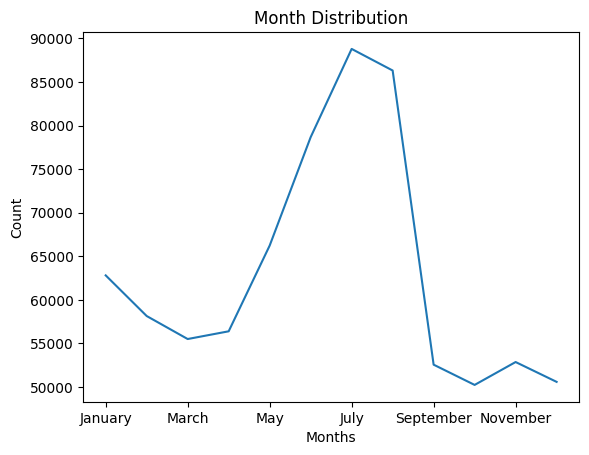

In [ ]:
month_df.plot(x="Date")
plt.title("Month Distribution")
plt.xlabel("Months")
plt.ylabel("Count")

Summer months are the months with the most amount of arrival gate delays

In [ ]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy = df.copy()
df_copy.Date = pd.to_datetime(df_copy["Date"])
df_copy["Date"] = df_copy["Date"].dt.day_name()
week_df = df_copy.groupby("Date")["Average Gate Arrival Delay"].sum().reindex(cats) 
print(week_df)

Date
Monday       114098.15
Tuesday      109464.76
Wednesday    105697.20
Thursday     119667.87
Friday       117133.96
Saturday      88354.97
Sunday       104695.68
Name: Average Gate Arrival Delay, dtype: float64


Text(0, 0.5, 'Amount')

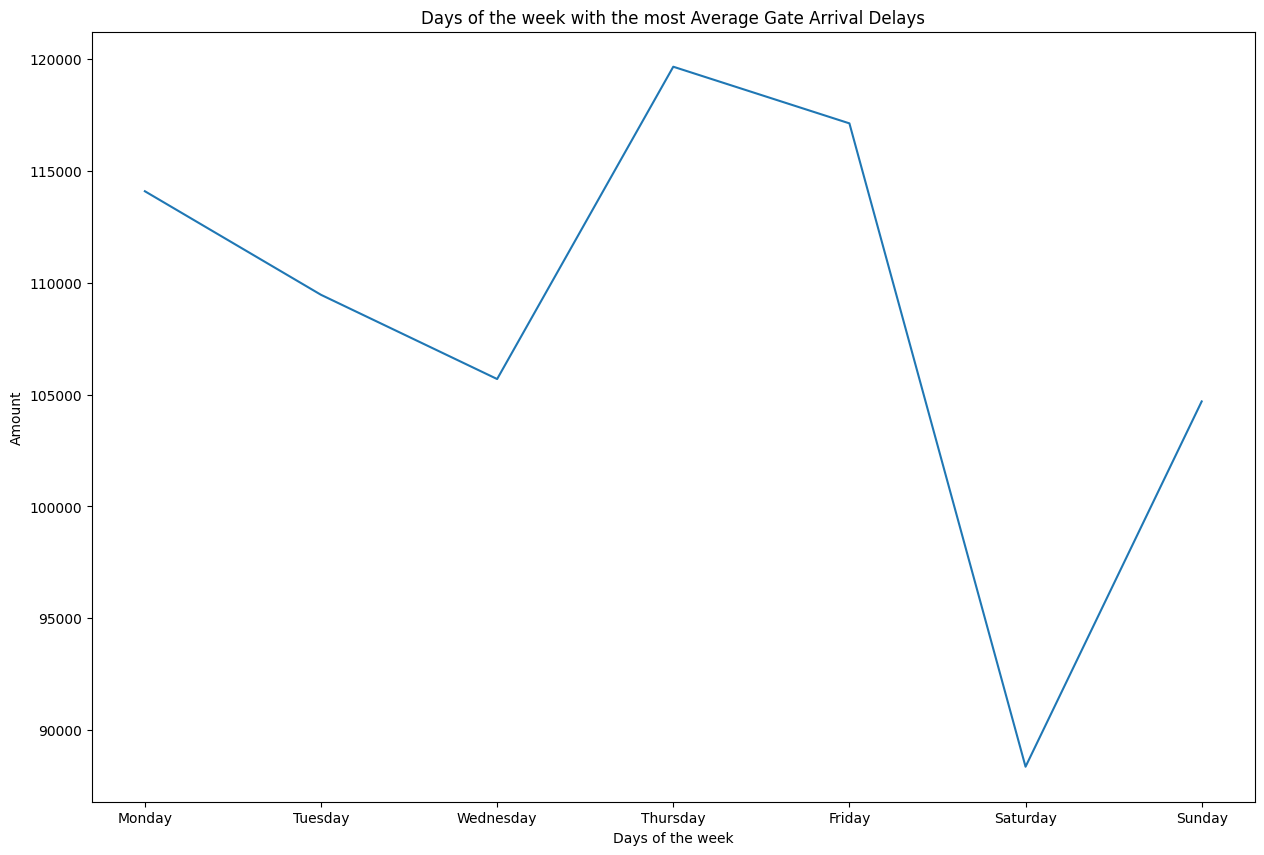

In [ ]:
plt.figure(figsize = (15,10))
week_df.plot(x="Date")
plt.title("Days of the week with the most Average Gate Arrival Delays")
plt.xlabel("Days of the week")
plt.ylabel("Amount")

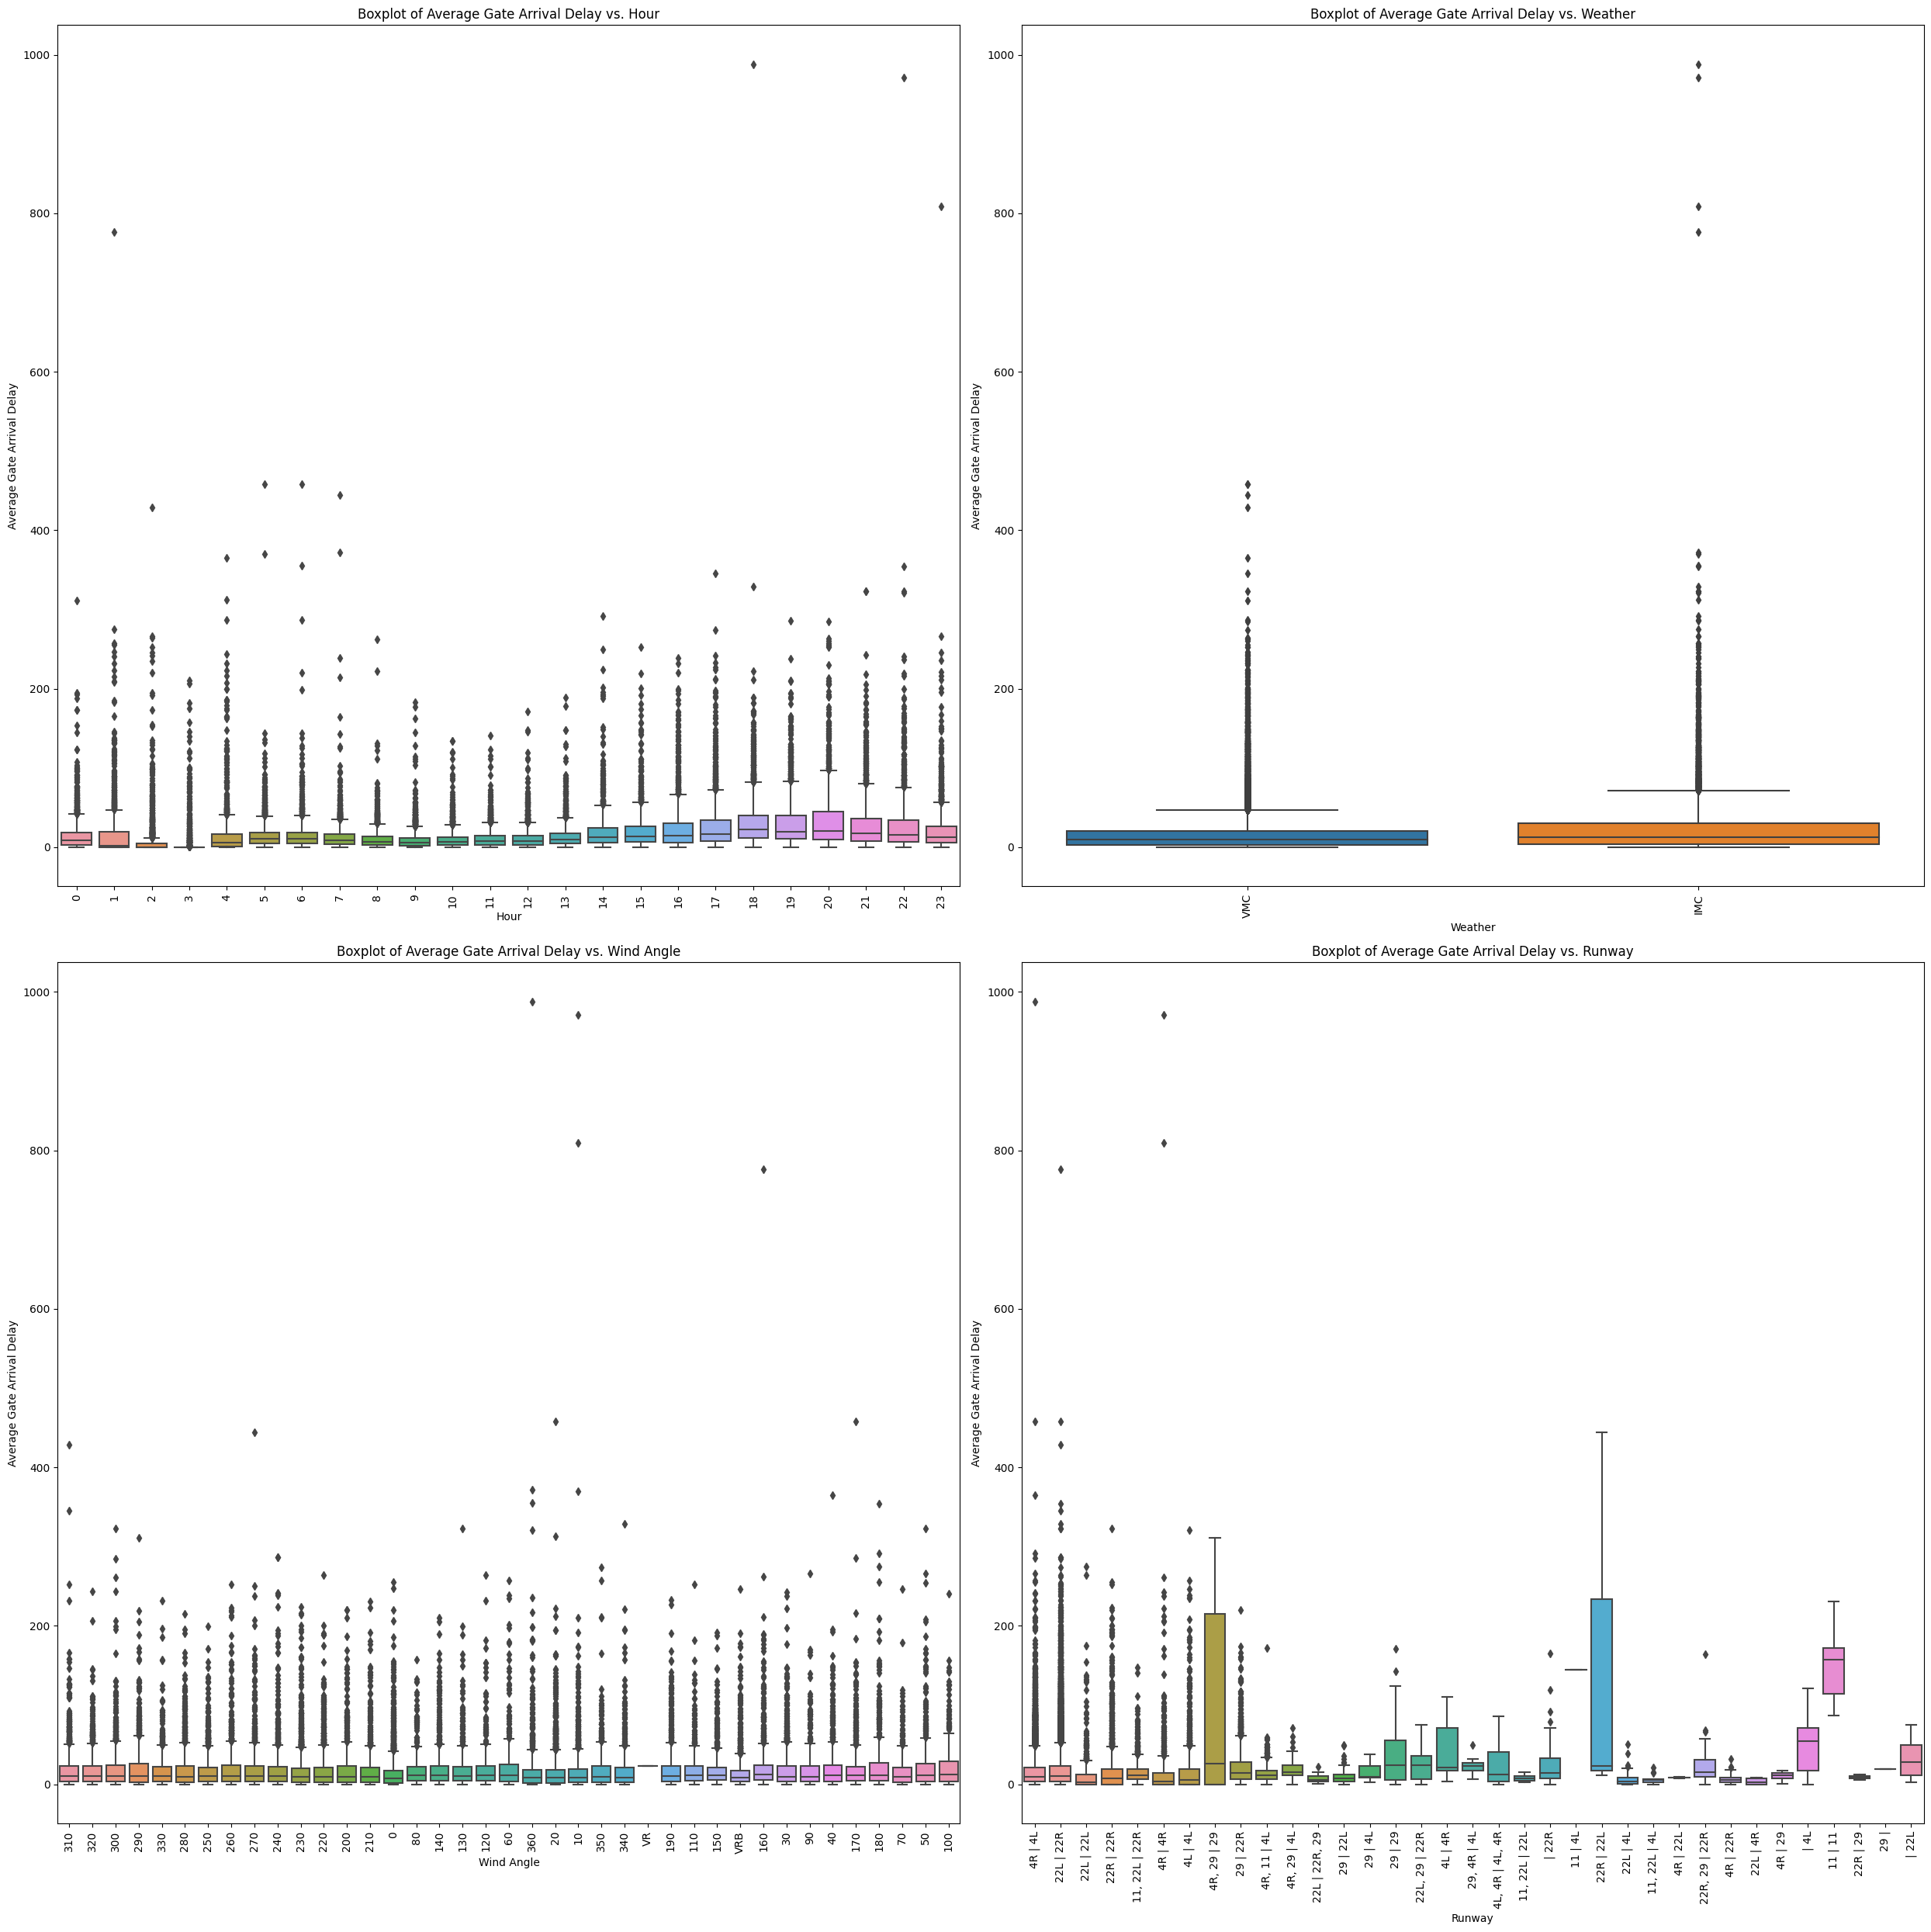

In [ ]:
# Plotting Categorical features to see their distribution 
plt.figure(figsize=(25,25))
vars_to_plot = ['Hour','Weather', 'Wind Angle',"Runway"]
for i, var in enumerate(vars_to_plot):
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(x=var, y='Average Gate Arrival Delay', data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # rotate xtick labels
    title_string = "Boxplot of Average Gate Arrival Delay vs. " + var
    plt.ylabel("Average Gate Arrival Delay")
    plt.title(title_string)

plt.tight_layout()
plt.show()

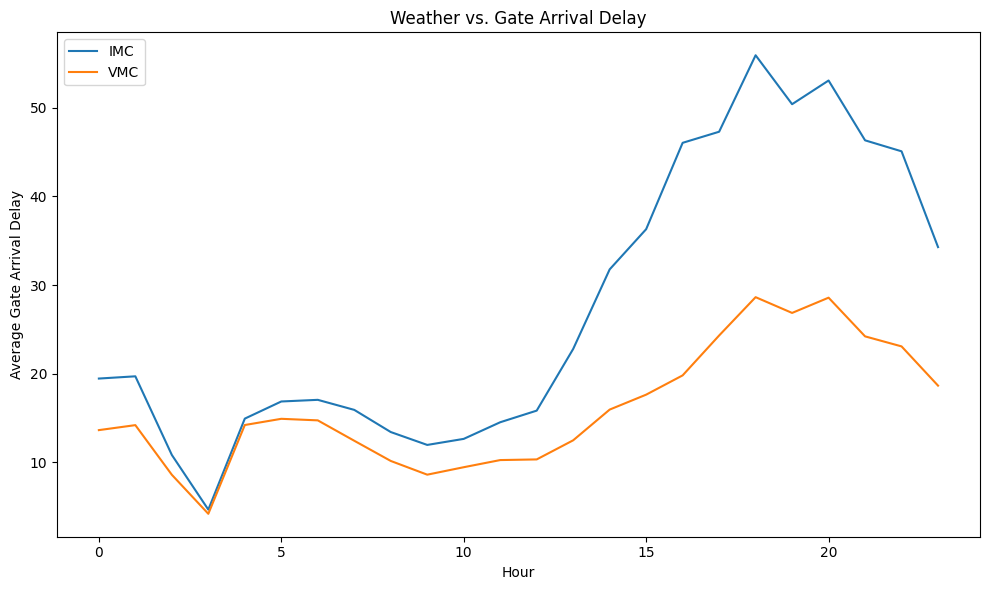

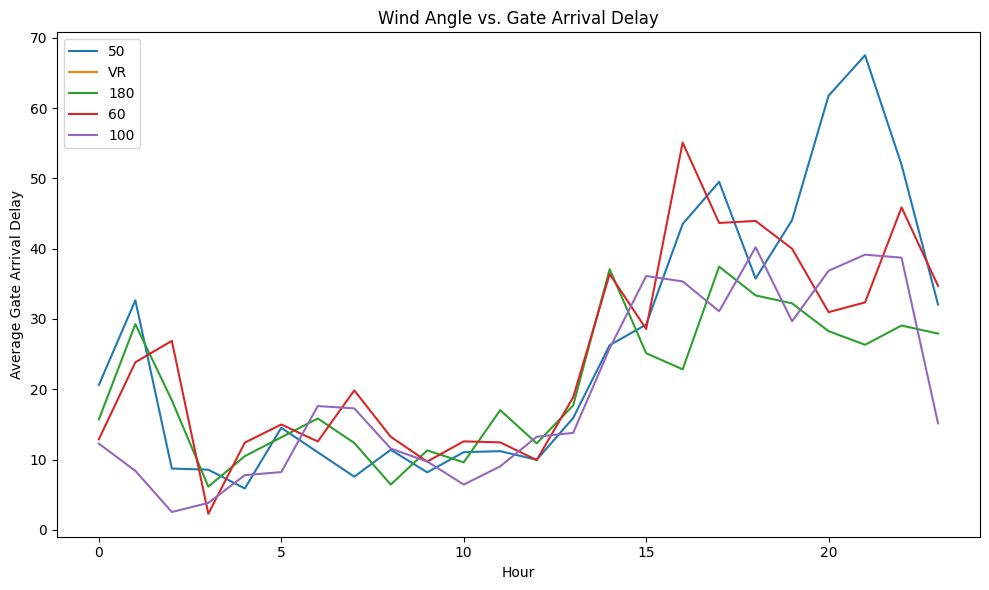

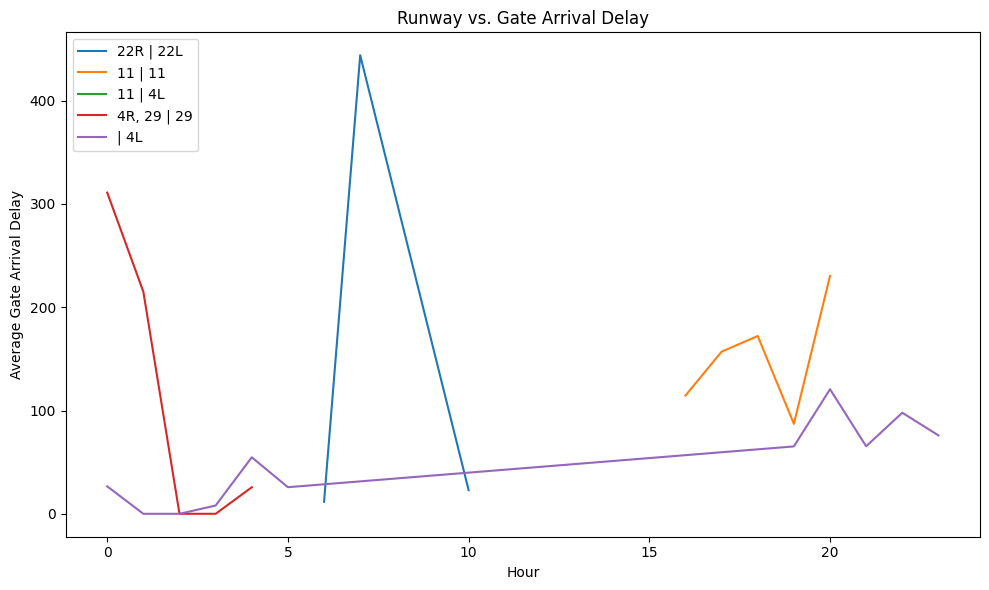

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['Weather', 'Wind Angle', 'Runway']
top_cats = {}

for col in cols_to_plot:
    col_grouped = df.groupby(col)['Average Gate Arrival Delay'].mean().reset_index()
    col_sorted = col_grouped.sort_values(by='Average Gate Arrival Delay', ascending=False)
    top_cats[col] = col_sorted.head(5)[col].tolist()

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    for cat in top_cats[col]:
        cat_data = df[df[col] == cat]
        date_grouped = cat_data.groupby('Hour')['Average Gate Arrival Delay'].mean().reset_index()
        sns.lineplot(x='Hour', y='Average Gate Arrival Delay', data=date_grouped, label=cat)
    plt.title(f"{col} vs. Gate Arrival Delay")
    plt.xlabel("Hour")
    plt.ylabel("Average Gate Arrival Delay")
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()


- IMC is the one with the greatest Average Gate Arrival Delay, and that is understandable since [IMC](https://www.faa.gov/air_traffic/nas/nynjphl_redesign/documentation/feis/media/Appendix_A-National_Airspace_System_Overview.pdf) exist during times of rain, low clouds, or reduced visibility.
- Then we see runways distribution and is also understandable since runways are available per hours, that is why we do not see a continuos line through hours, but we can see the peak delay for some runways. 

## Handling Missing Values

In [ ]:
df.isnull().sum()/len(df)

Date                                     0.000000
Hour                                     0.000000
Scheduled Departures                     0.000000
Scheduled Arrivals                       0.000000
Departures For Metric Computation        0.000000
Arrivals For Metric Computation          0.000000
% On-Time Gate Departures                0.000000
% On-Time Airport Departures             0.000000
% On-Time Gate Arrivals                  0.000000
Average Gate Departure Delay             0.000000
Average Taxi Out Time                    0.000000
Average Taxi Out Delay                   0.000000
Average Airport Departure Delay          0.000000
Average Airborne Delay                   0.000000
Average Taxi In Delay                    0.000000
Average Block Delay                      0.000000
Average Gate Arrival Delay               0.000000
Facility                                 0.000000
GMT Hour                                 0.000000
Departures For Efficiency Computation    0.000000


In [ ]:
# Dropping Airport weather since it has more than 84% of missing values, and 
# Facility since is only one value
df.drop(columns=["Airport Weather","Facility"], axis=1, inplace=True)

In [ ]:
null_columns_count = df.isnull().sum()/len(df)
null_columns_count[null_columns_count > 0]
display(df.isnull().sum())

Date                                        0
Hour                                        0
Scheduled Departures                        0
Scheduled Arrivals                          0
Departures For Metric Computation           0
Arrivals For Metric Computation             0
% On-Time Gate Departures                   0
% On-Time Airport Departures                0
% On-Time Gate Arrivals                     0
Average Gate Departure Delay                0
Average Taxi Out Time                       0
Average Taxi Out Delay                      0
Average Airport Departure Delay             0
Average Airborne Delay                      0
Average Taxi In Delay                       0
Average Block Delay                         0
Average Gate Arrival Delay                  0
GMT Hour                                    0
Departures For Efficiency Computation       0
Arrivals For Efficiency Computation         0
Total For Efficiency Computation            0
Weather                           

In [ ]:
df.Date = pd.to_datetime(df["Date"])
df[["Temp(F)","Wind Angle","Wind Speed (Knots)","Runway"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41873 entries, 0 to 41872
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temp(F)             38670 non-null  float64
 1   Wind Angle          41645 non-null  object 
 2   Wind Speed (Knots)  41645 non-null  float64
 3   Runway              41324 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.6+ MB


In [ ]:
for col in df[["Temp(F)","Wind Angle","Wind Speed (Knots)","Runway"]].columns:
    if df[["Temp(F)","Wind Angle","Wind Speed (Knots)","Runway"]][col].dtype == 'float64':
      print(df[col].mean())
      df[col].fillna(value=df[col].mean(),inplace=True)

df[["Temp(F)","Wind Angle","Wind Speed (Knots)","Runway"]].isnull().sum()

59.55234031549004
8.294897346620242


Temp(F)                 0
Wind Angle            228
Wind Speed (Knots)      0
Runway                549
dtype: int64

In [ ]:
df.dropna(subset=['Wind Angle', 'Runway'], inplace=True)
df[["Temp(F)","Wind Angle","Wind Speed (Knots)","Runway"]].isnull().sum()

Temp(F)               0
Wind Angle            0
Wind Speed (Knots)    0
Runway                0
dtype: int64

## Handling Outliers

### Numerical Data

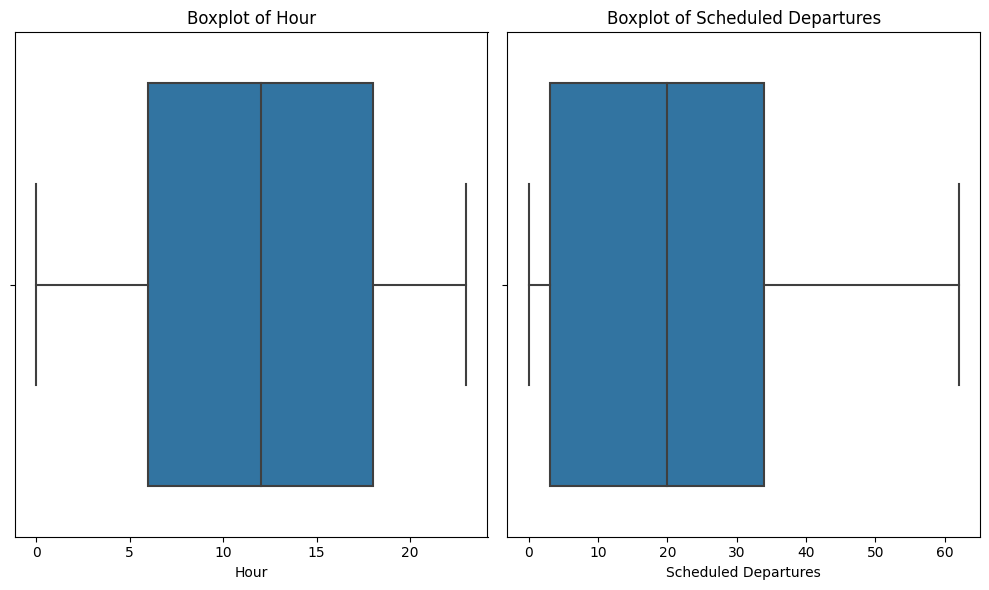

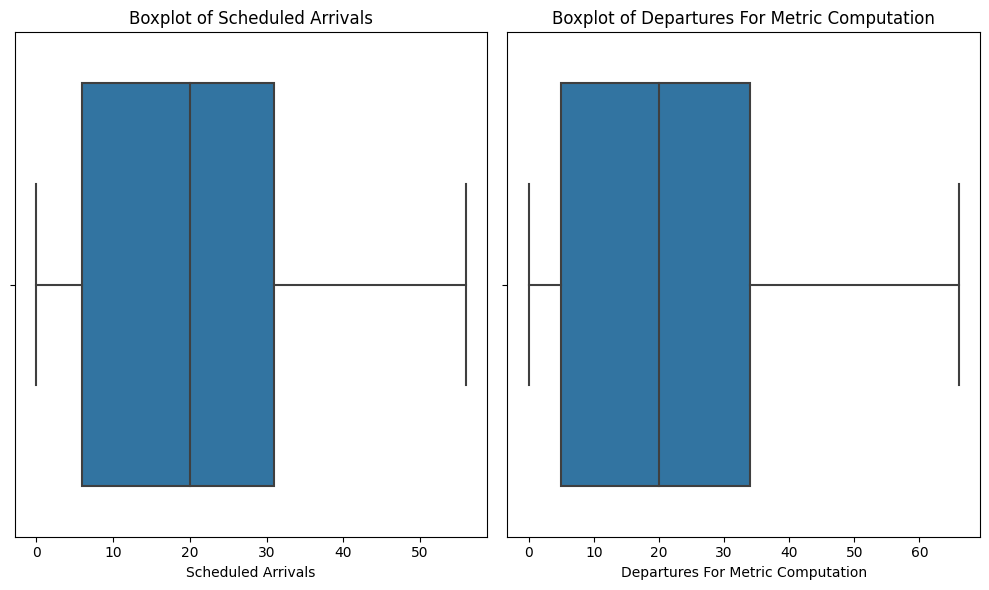

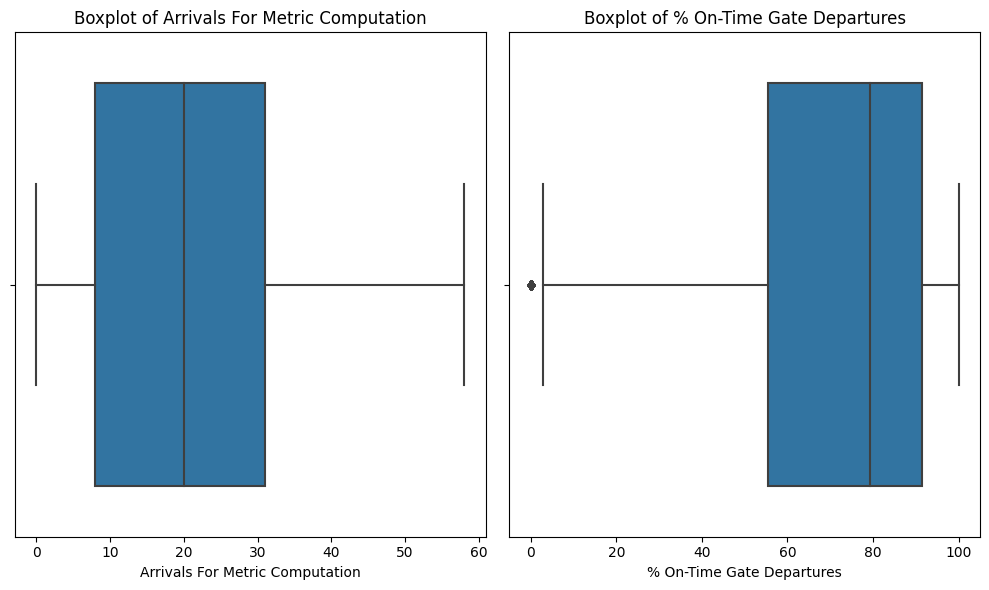

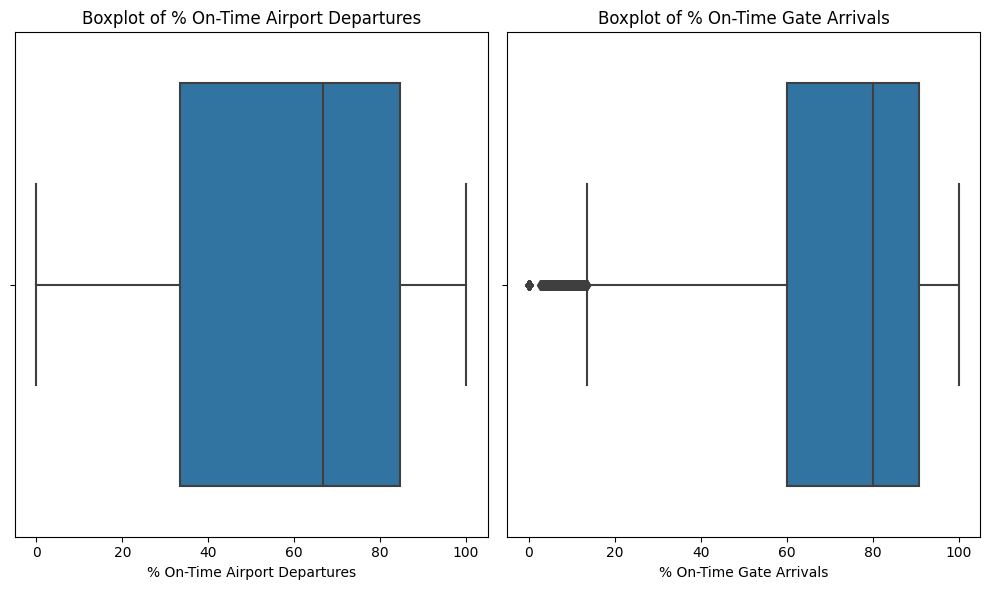

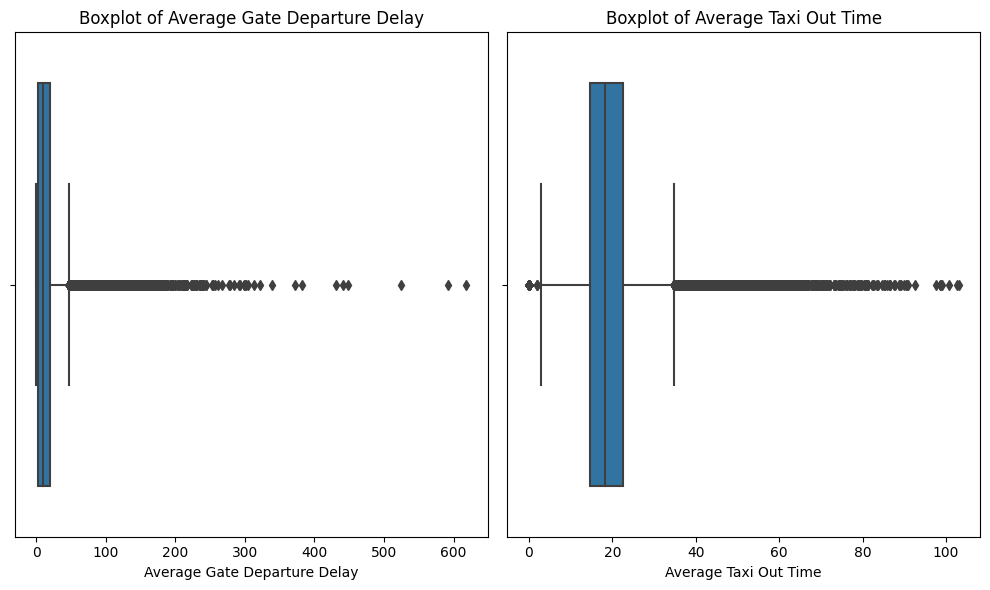

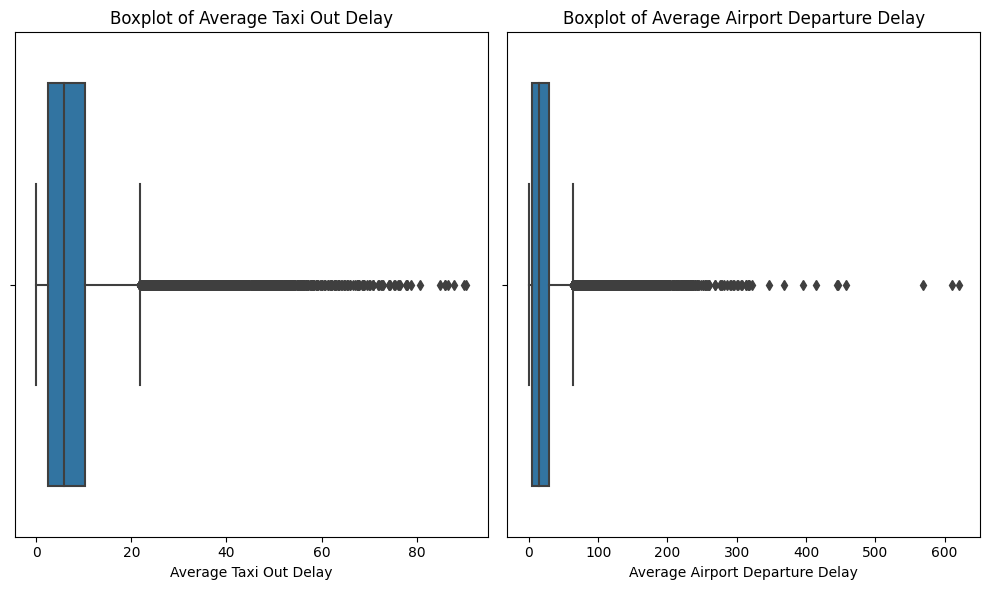

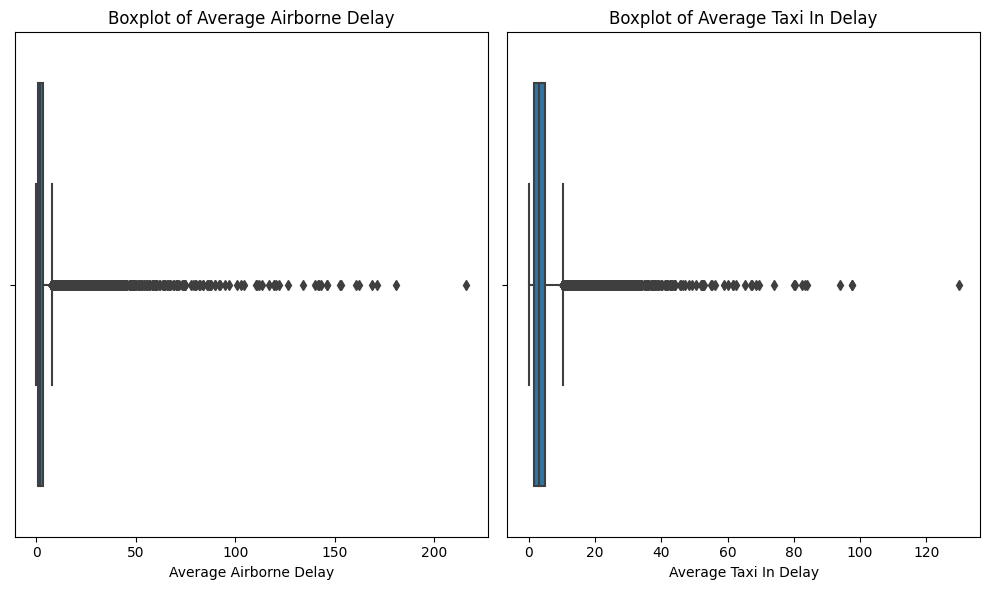

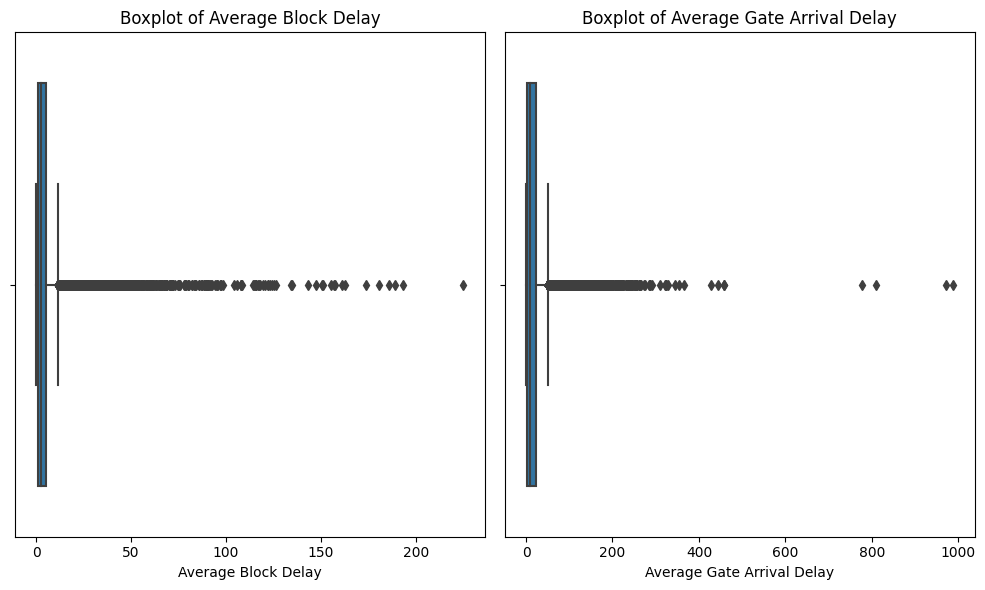

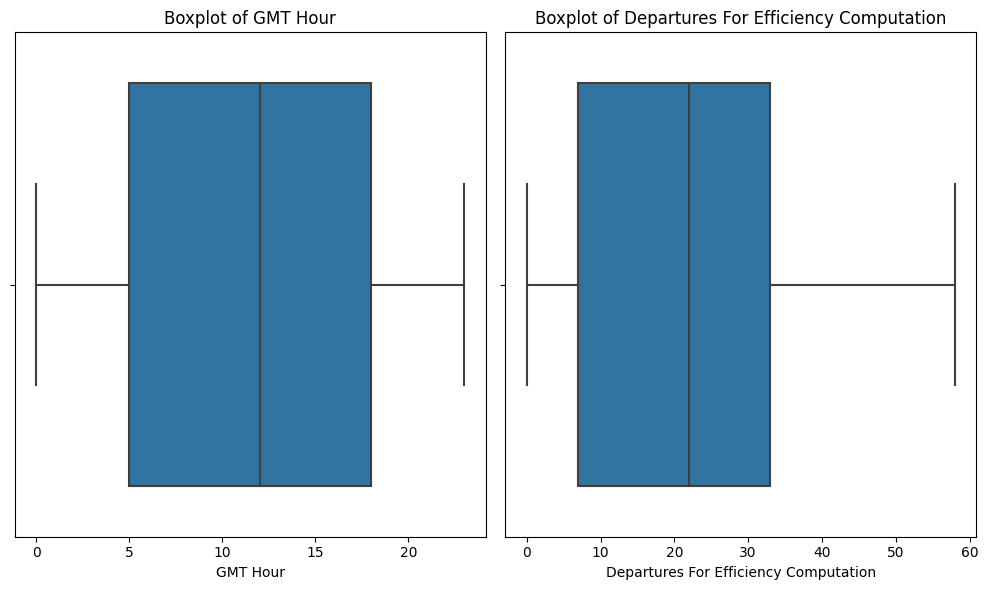

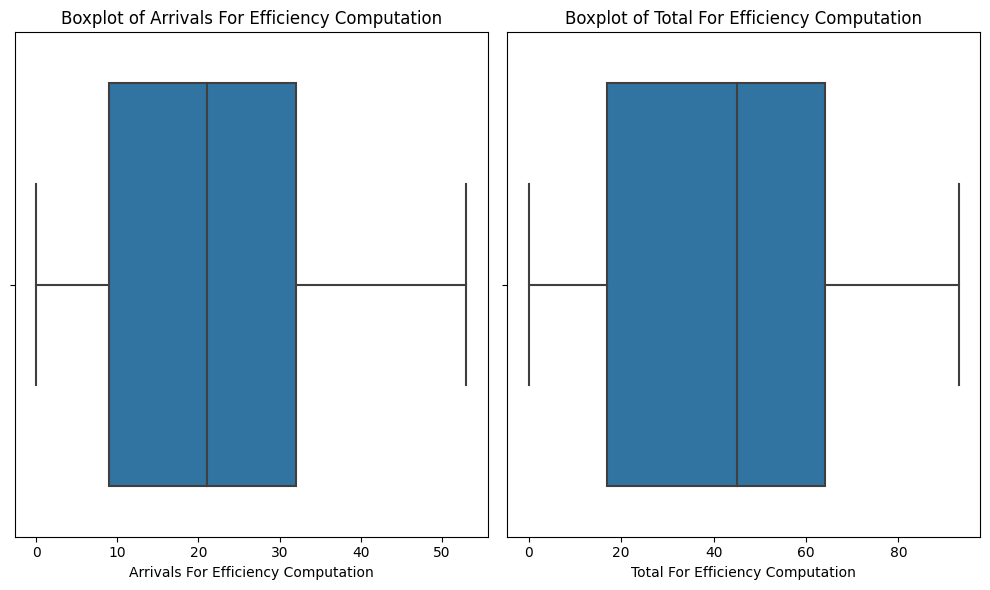

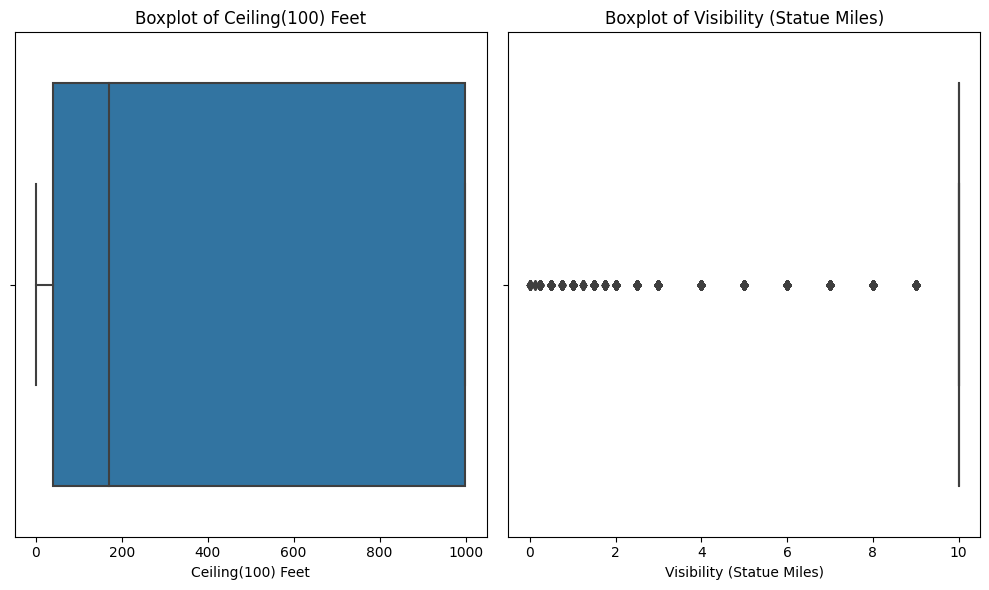

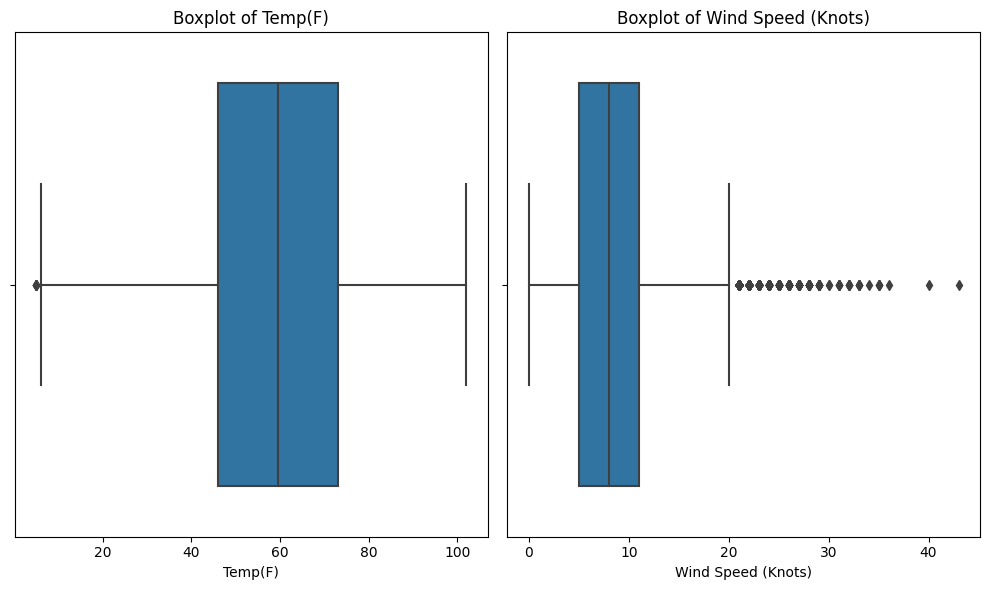

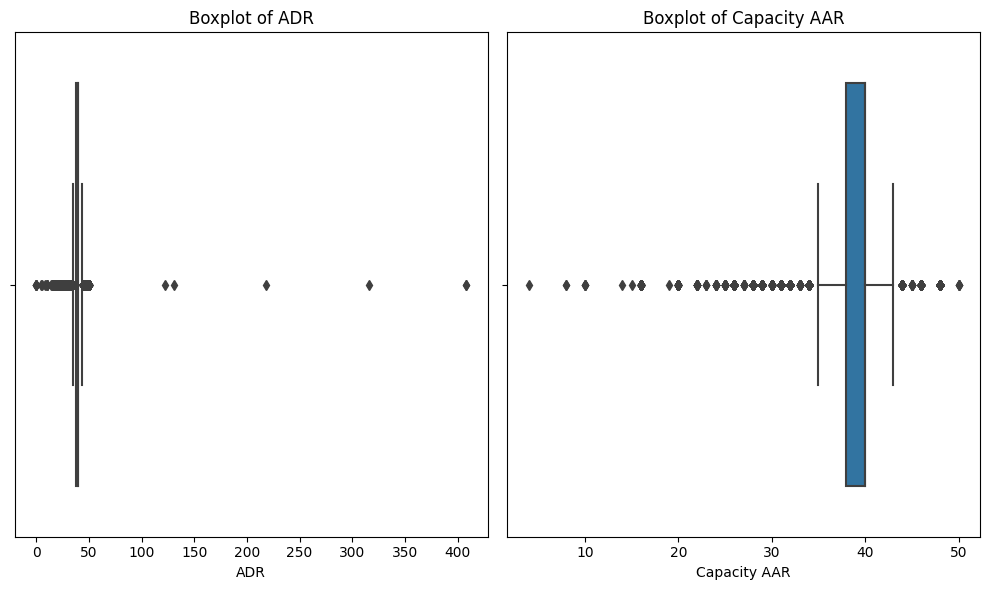

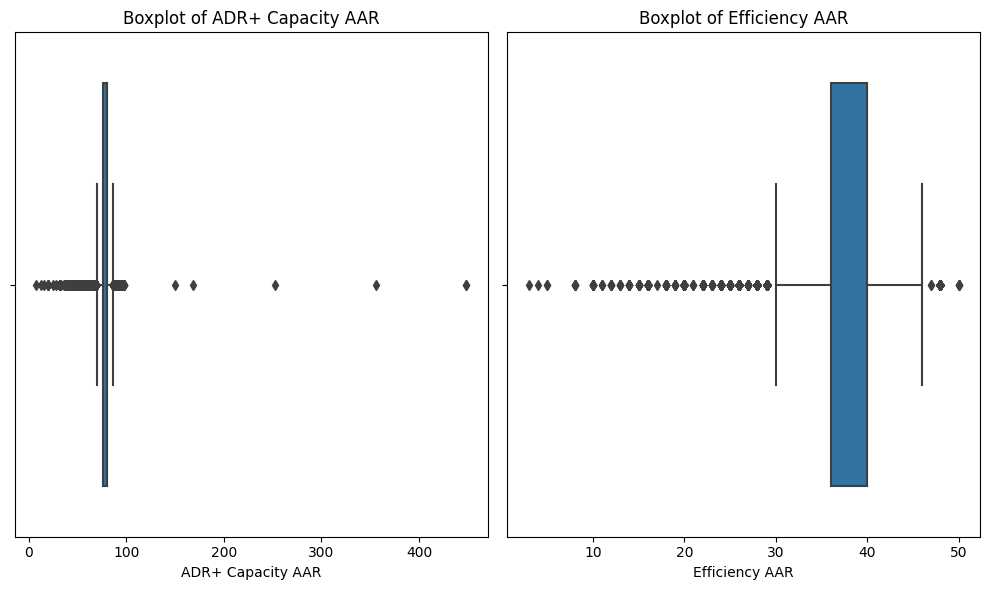

In [ ]:
# select only columns with numeric data types
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# loop through each numeric column and create a boxplot
for i, col in enumerate(num_cols):
    if i % 2 == 0:
        plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, i % 2 + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    if i % 2 == 1 or i == len(num_cols) - 1:
        plt.tight_layout()
        plt.show()

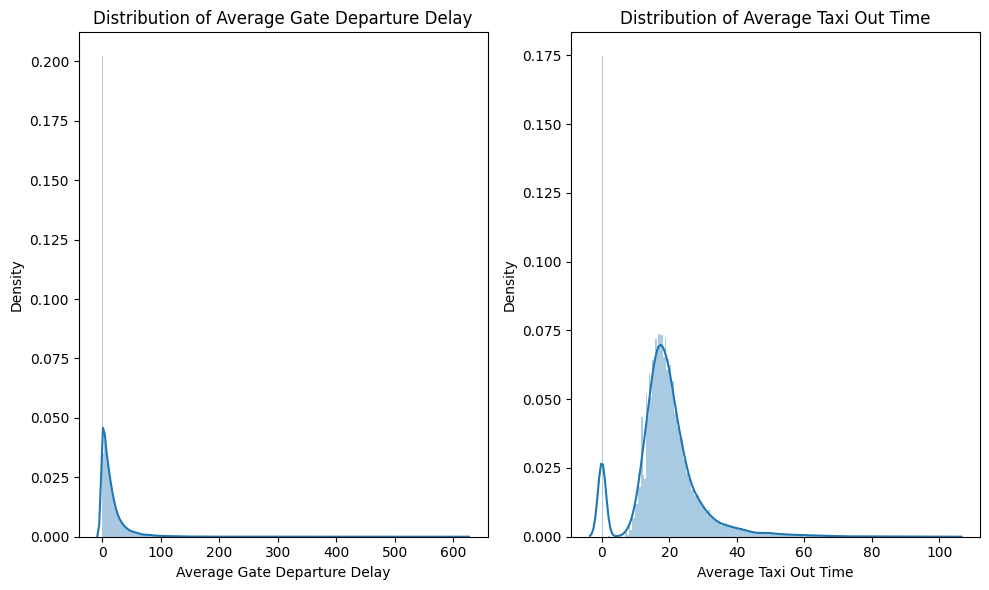

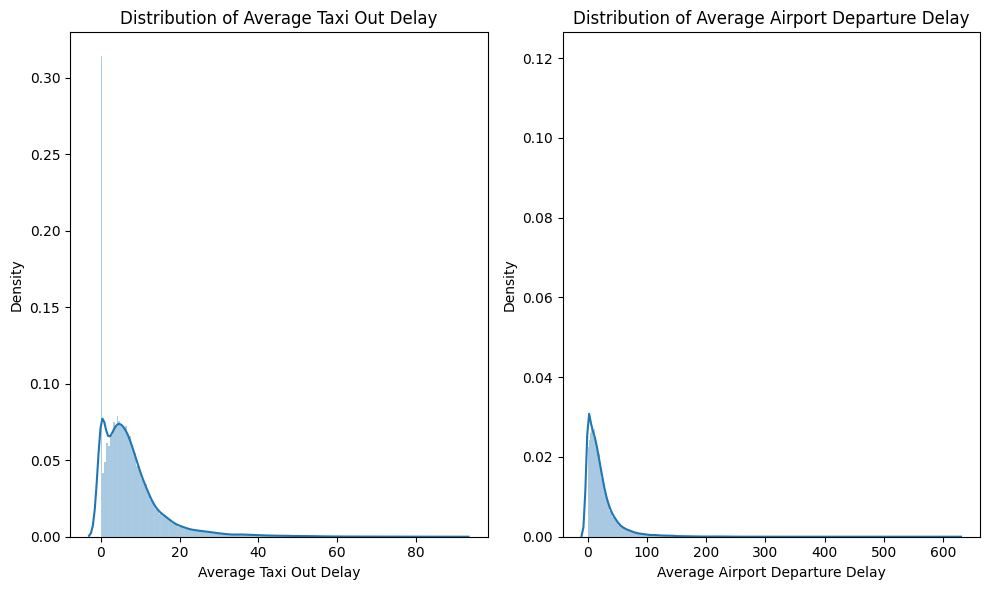

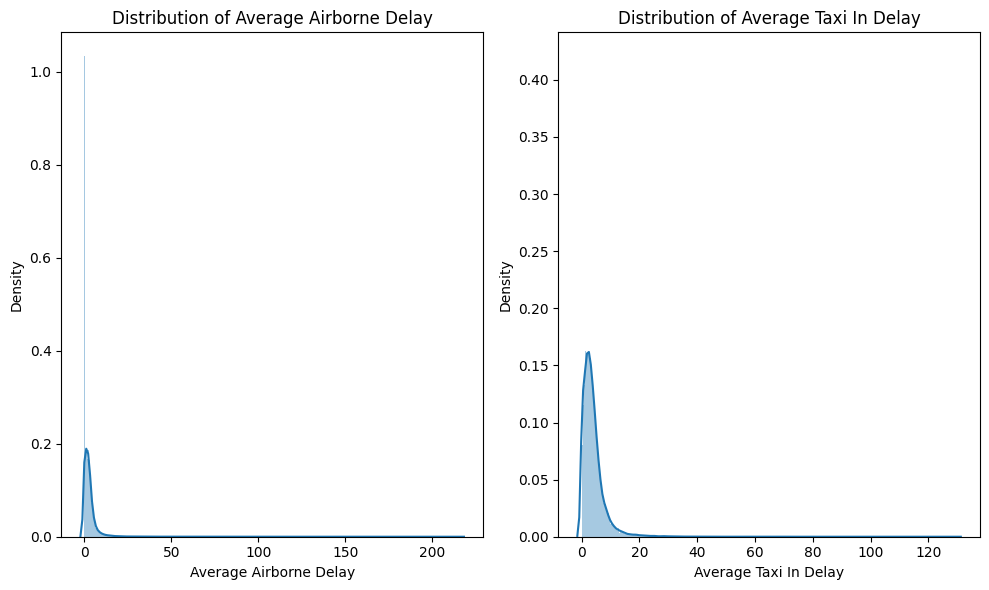

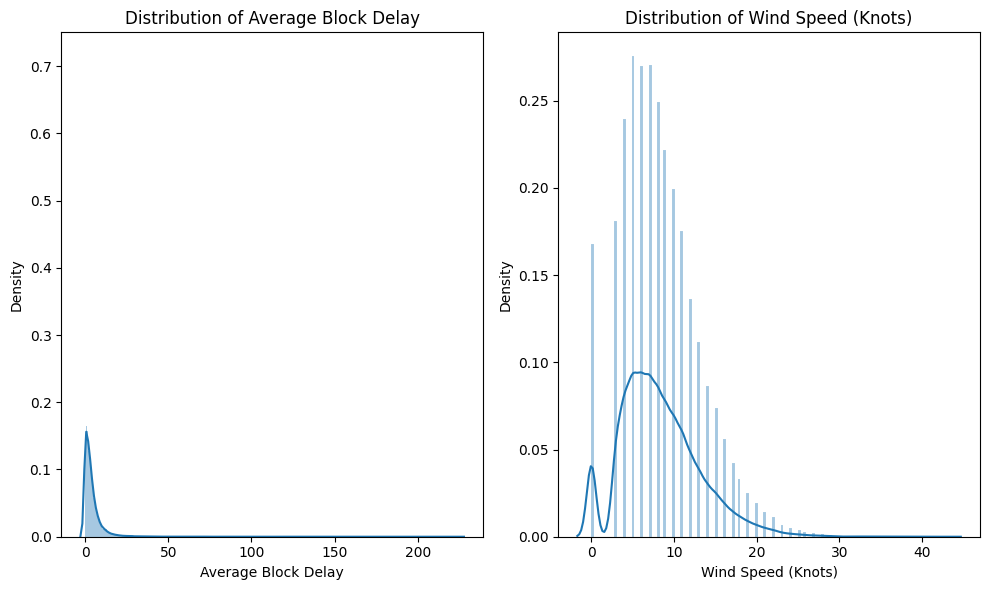

In [ ]:
cols_outliers = ["Average Gate Departure Delay","Average Taxi Out Time","Average Taxi Out Delay",
    "Average Airport Departure Delay","Average Airborne Delay","Average Taxi In Delay",
    "Average Block Delay","Wind Speed (Knots)"]

# Lests see the distribution per column with a distplot
for i, col in enumerate(cols_outliers):
    if i % 2 == 0:
        plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, i % 2 + 1)
    sns.histplot(
    df[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))
    plt.title(f"Distribution of {col}")
    plt.title(f"Distribution of {col}")
    if i % 2 == 1 or i == len(num_cols) - 1:
        plt.tight_layout()
        plt.show()


In [ ]:
def remove_outliers_iqr(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df_new = remove_outliers_iqr(df, cols_outliers).reset_index()

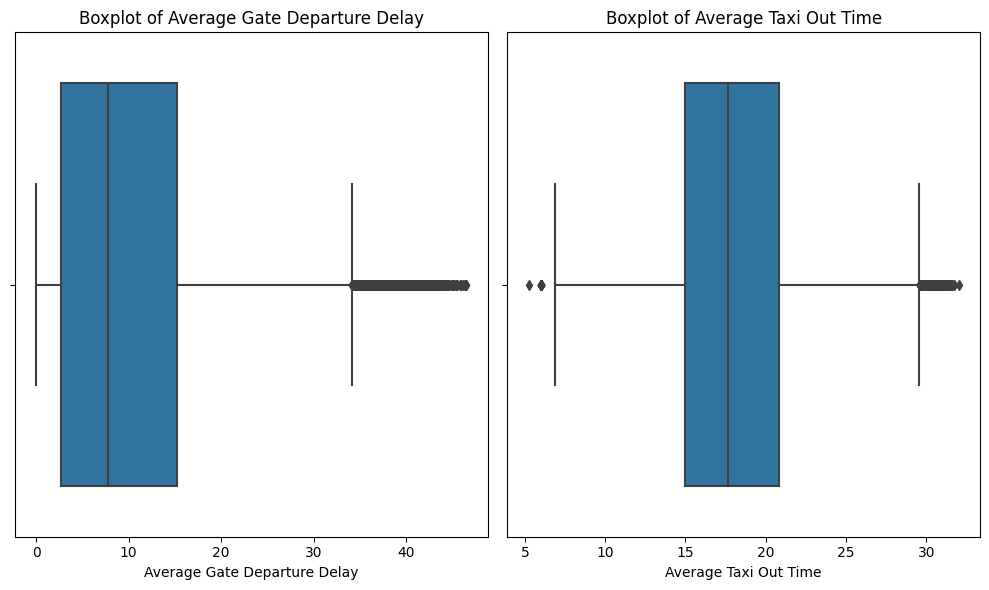

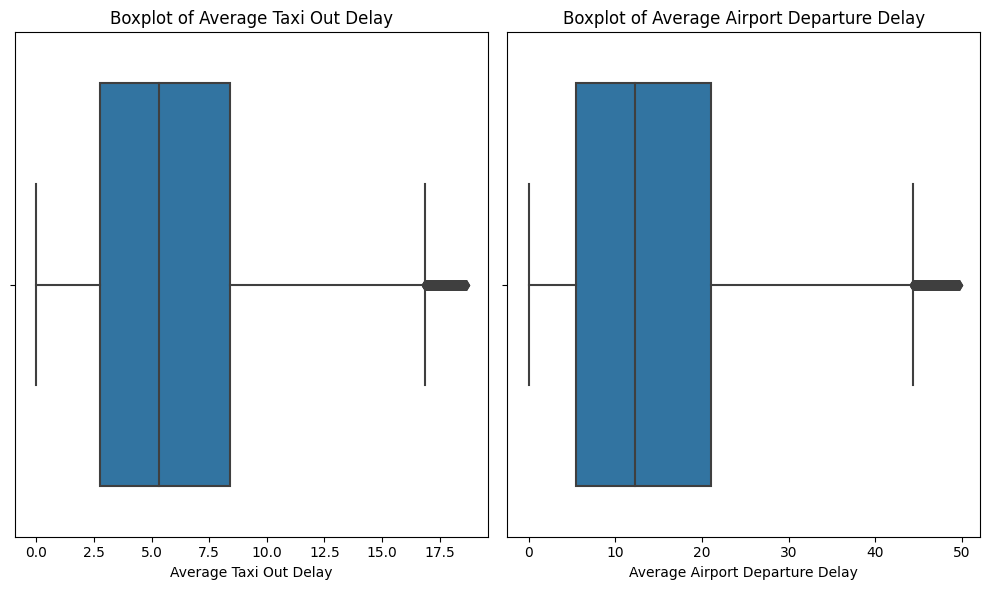

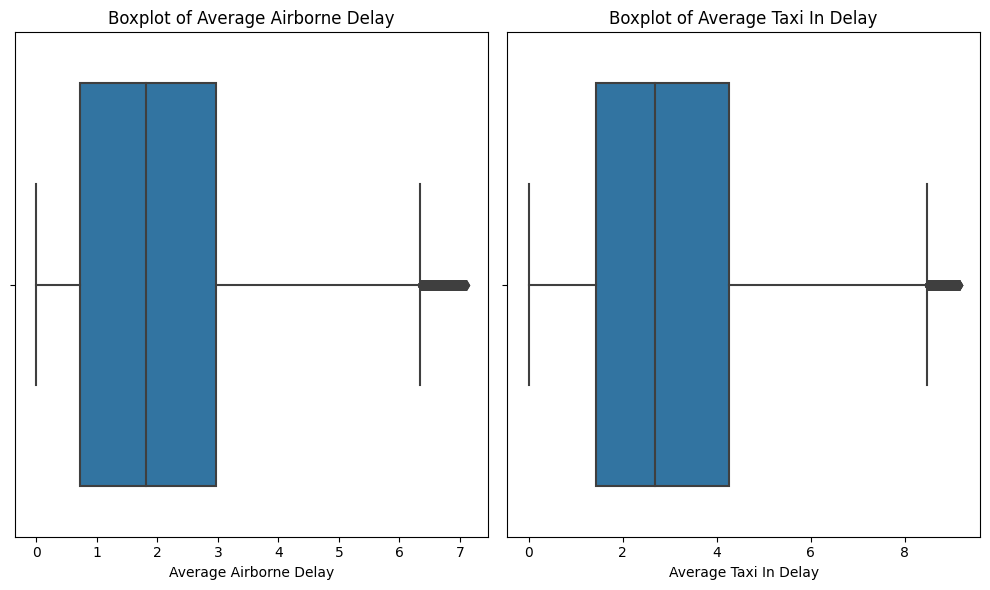

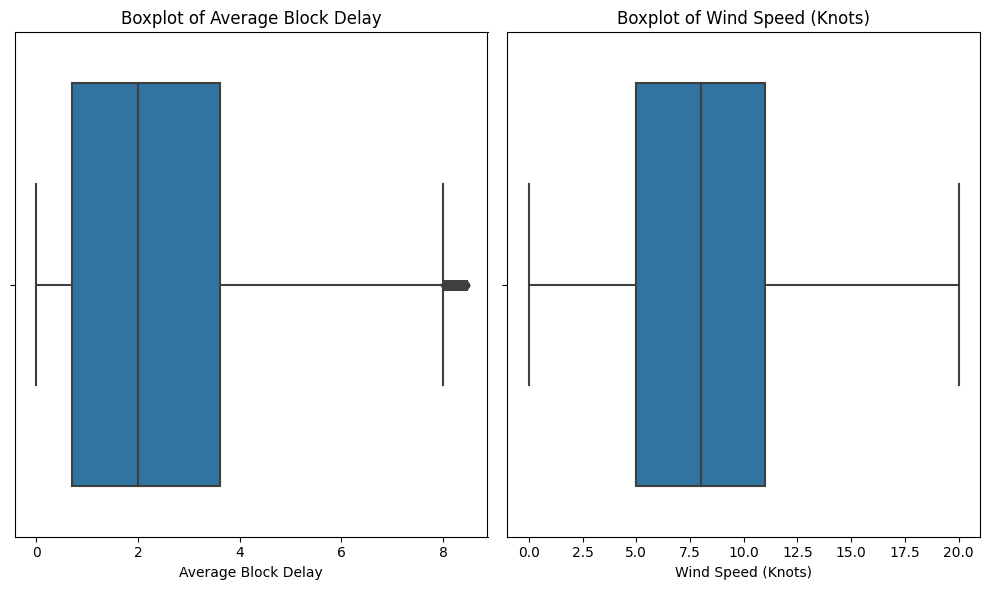

In [ ]:
for i, col in enumerate(cols_outliers):
    if i % 2 == 0:
        plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, i % 2 + 1)
    sns.boxplot(x=df_new[col])
    plt.title(f"Boxplot of {col}")
    if i % 2 == 1 or i == len(num_cols) - 1:
        plt.tight_layout()
        plt.show()

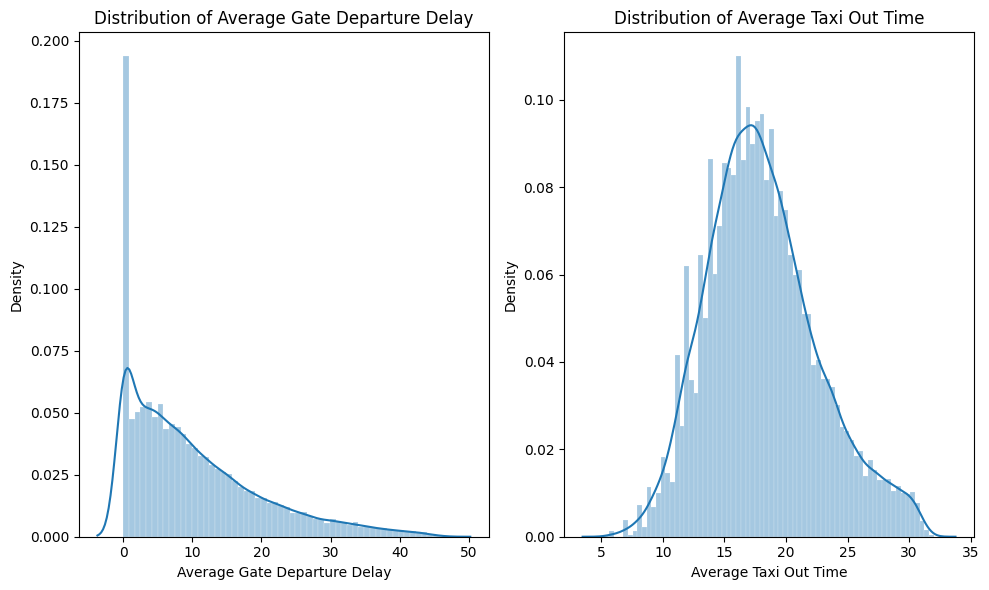

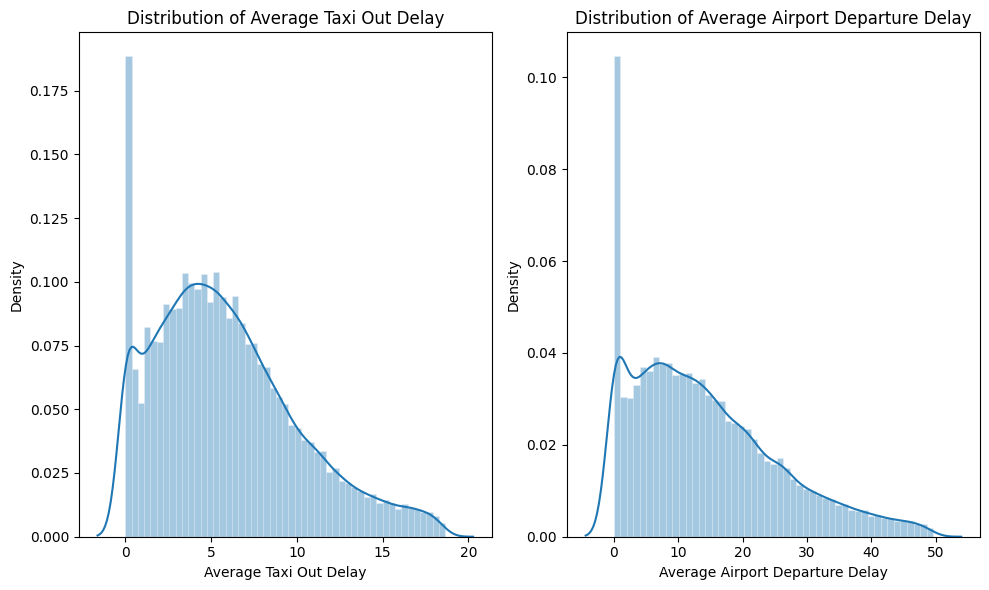

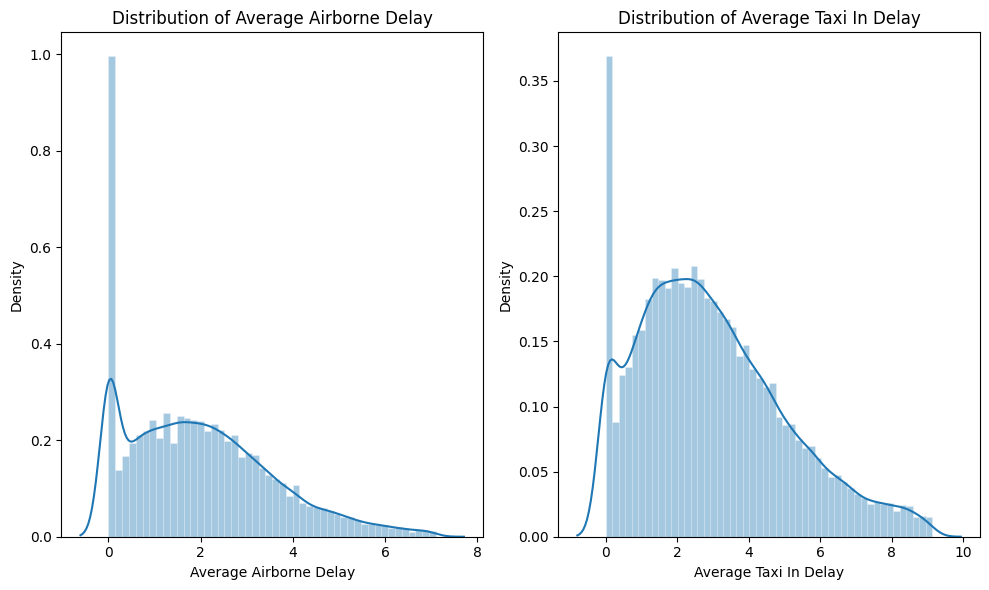

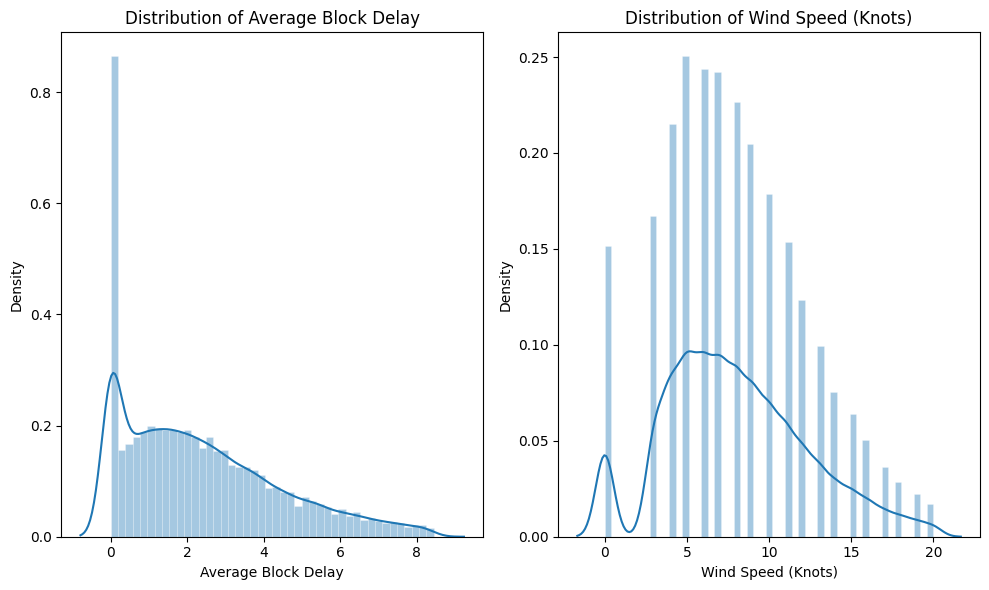

In [ ]:
for i, col in enumerate(cols_outliers):
    if i % 2 == 0:
        plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, i % 2 + 1)
    sns.histplot(
    df_new[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))
    plt.title(f"Distribution of {col}")
    if i % 2 == 1 or i == len(num_cols) - 1:
        plt.tight_layout()
        plt.show()

## Feature Engineering


In [ ]:
# Creating columns for the date
df.Date = pd.to_datetime(df["Date"])
df["Month"] =  df['Date'].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()
df["Year"] = df["Date"].dt.year

df

Date  Hour  Scheduled Departures  Scheduled Arrivals  \
0     2018-01-01     1                     1                   3   
1     2018-01-01     2                     0                   2   
2     2018-01-01     3                     0                   0   
3     2018-01-01     4                     0                   4   
4     2018-01-01     5                     6                  12   
...          ...   ...                   ...                 ...   
41868 2022-11-30    19                    35                  39   
41869 2022-11-30    20                    33                  32   
41870 2022-11-30    21                    30                  26   
41871 2022-11-30    22                     5                  16   
41872 2022-11-30    23                     4                  19   

       Departures For Metric Computation  Arrivals For Metric Computation  \
0                                      1                                0   
1                                      0                                1   
2                                      0                                0   
3                                      0                                1   
4                                      6                                7   
...                                  ...                              ...   
41868                                 30                               31   
41869                                 25                               24   
41870                                 27                               20   
41871                                 12                               17   
41872                                  8                               25   

       % On-Time Gate Departures  % On-Time Airport Departures  \
0                         100.00                        100.00   
1                           0.00                          0.00   
2                           0.00                          0.00   
3                           0.00                          0.00   
4                         100.00                         83.33   
...                          ...                           ...   
41868                      46.67                         23.33   
41869                      28.00                         24.00   
41870                      48.15                         51.85   
41871                      41.67                         41.67   
41872                      12.50                         12.50   

       % On-Time Gate Arrivals  Average Gate Departure Delay  ...  \
0                         0.00                          8.00  ...   
1                         0.00                          0.00  ...   
2                         0.00                          0.00  ...   
3                       100.00                          0.00  ...   
4                        85.71                          2.33  ...   
...                        ...                           ...  ...   
41868                    22.58                         51.87  ...   
41869                    29.17                         63.48  ...   
41870                    45.00                         60.85  ...   
41871                    35.29                         21.17  ...   
41872                    56.00                         42.38  ...   

       Wind Speed (Knots)     Runway  ADR  Capacity AAR  ADR+ Capacity AAR  \
0                    13.0    4R | 4L   40            40                 80   
1                    11.0    4R | 4L   40            40                 80   
2                    11.0    4R | 4L   40            40                 80   
3                    13.0    4R | 4L   40            40                 80   
4                    16.0    4R | 4L   40            40                 80   
...                   ...        ...  ...           ...                ...   
41868                20.0  22L | 22R   30            32                 62   
41869                25.

### Box-Cox Transformation

In [ ]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics.gofplots as gof

target_var = "Average Gate Arrival Delay"

# Calculate the Box-Cox parameter using the target variable
boxcox_param = stats.boxcox_normmax(df_new[target_var] + 1)

print("Box-Cox parameter for {} is: {:.2f}".format(target_var, boxcox_param))

Box-Cox parameter for Average Gate Arrival Delay is: 0.22


Text(0.5, 1.0, 'QQ plot of transformed data')

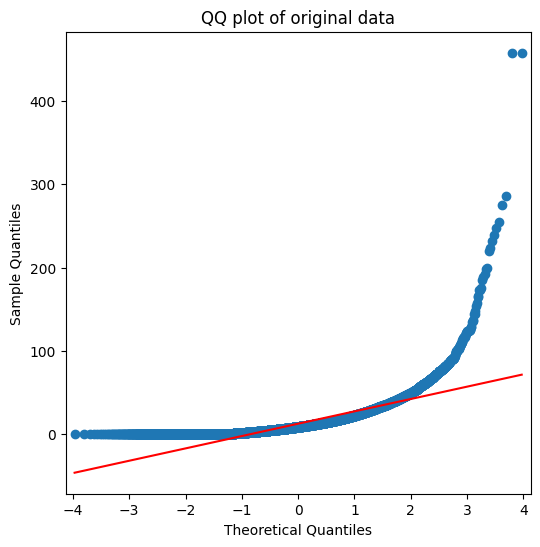

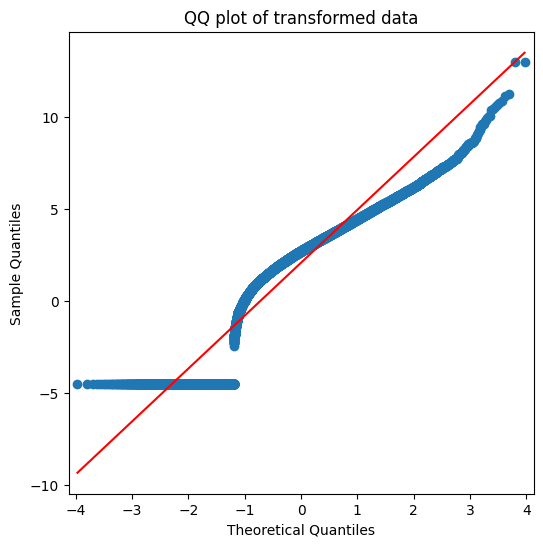

In [ ]:
transformed_data = (df_new["Average Gate Arrival Delay"]**0.22 - 1) / 0.22

# Create a QQ plot of the original data
fig, ax = plt.subplots(figsize=(6, 6))
gof.qqplot(df_new["Average Gate Arrival Delay"], line="s", ax=ax)
ax.set_title("QQ plot of original data")

# Create a QQ plot of the transformed data
fig, ax = plt.subplots(figsize=(6, 6))
gof.qqplot(transformed_data, line="s", ax=ax)
ax.set_title("QQ plot of transformed data")

### Processing and encoding atributtes - One Hot Encoder

One hot encoder for encoding attributes. 

One hot encoder on categorical attributes. 

One-Hot encoder:
- Wind Angle
- Runway
- Date (Week days)
- Date (Year)
- Weather (IMC - VMC)



In [ ]:
categorical_columns = ['Weather', 'Wind Angle','Runway','Year','Weekday']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [ ]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Date' 'Hour' 'Scheduled Departures' 'Scheduled Arrivals'
 'Departures For Metric Computation' 'Arrivals For Metric Computation'
 '% On-Time Gate Departures' '% On-Time Airport Departures'
 '% On-Time Gate Arrivals' 'Average Gate Departure Delay'
 'Average Taxi Out Time' 'Average Taxi Out Delay'
 'Average Airport Departure Delay' 'Average Airborne Delay'
 'Average Taxi In Delay' 'Average Block Delay'
 'Average Gate Arrival Delay' 'GMT Hour'
 'Departures For Efficiency Computation'
 'Arrivals For Efficiency Computation' 'Total For Efficiency Computation'
 'Weather' 'Ceiling(100) Feet' 'Visibility (Statue Miles)' 'Temp(F)'
 'Wind Angle' 'Wind Speed (Knots)' 'Runway' 'ADR' 'Capacity AAR'
 'ADR+ Capacity AAR' 'Efficiency AAR' 'Month' 'Day' 'Weekday' 'Year']

Number of rows and columns in the dataset: (41096, 36)

Columns in data frame after encoding dummy variable:
 ['Date' 'Hour' 'Scheduled Departures' 'Scheduled Arrivals'
 'Departures For Metric Computat

### Checking correlation

<ipython-input-42-add6c8a14d03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations =df_encode.corr()['Average Gate Arrival Delay'].sort_values(ascending=False)[1:]


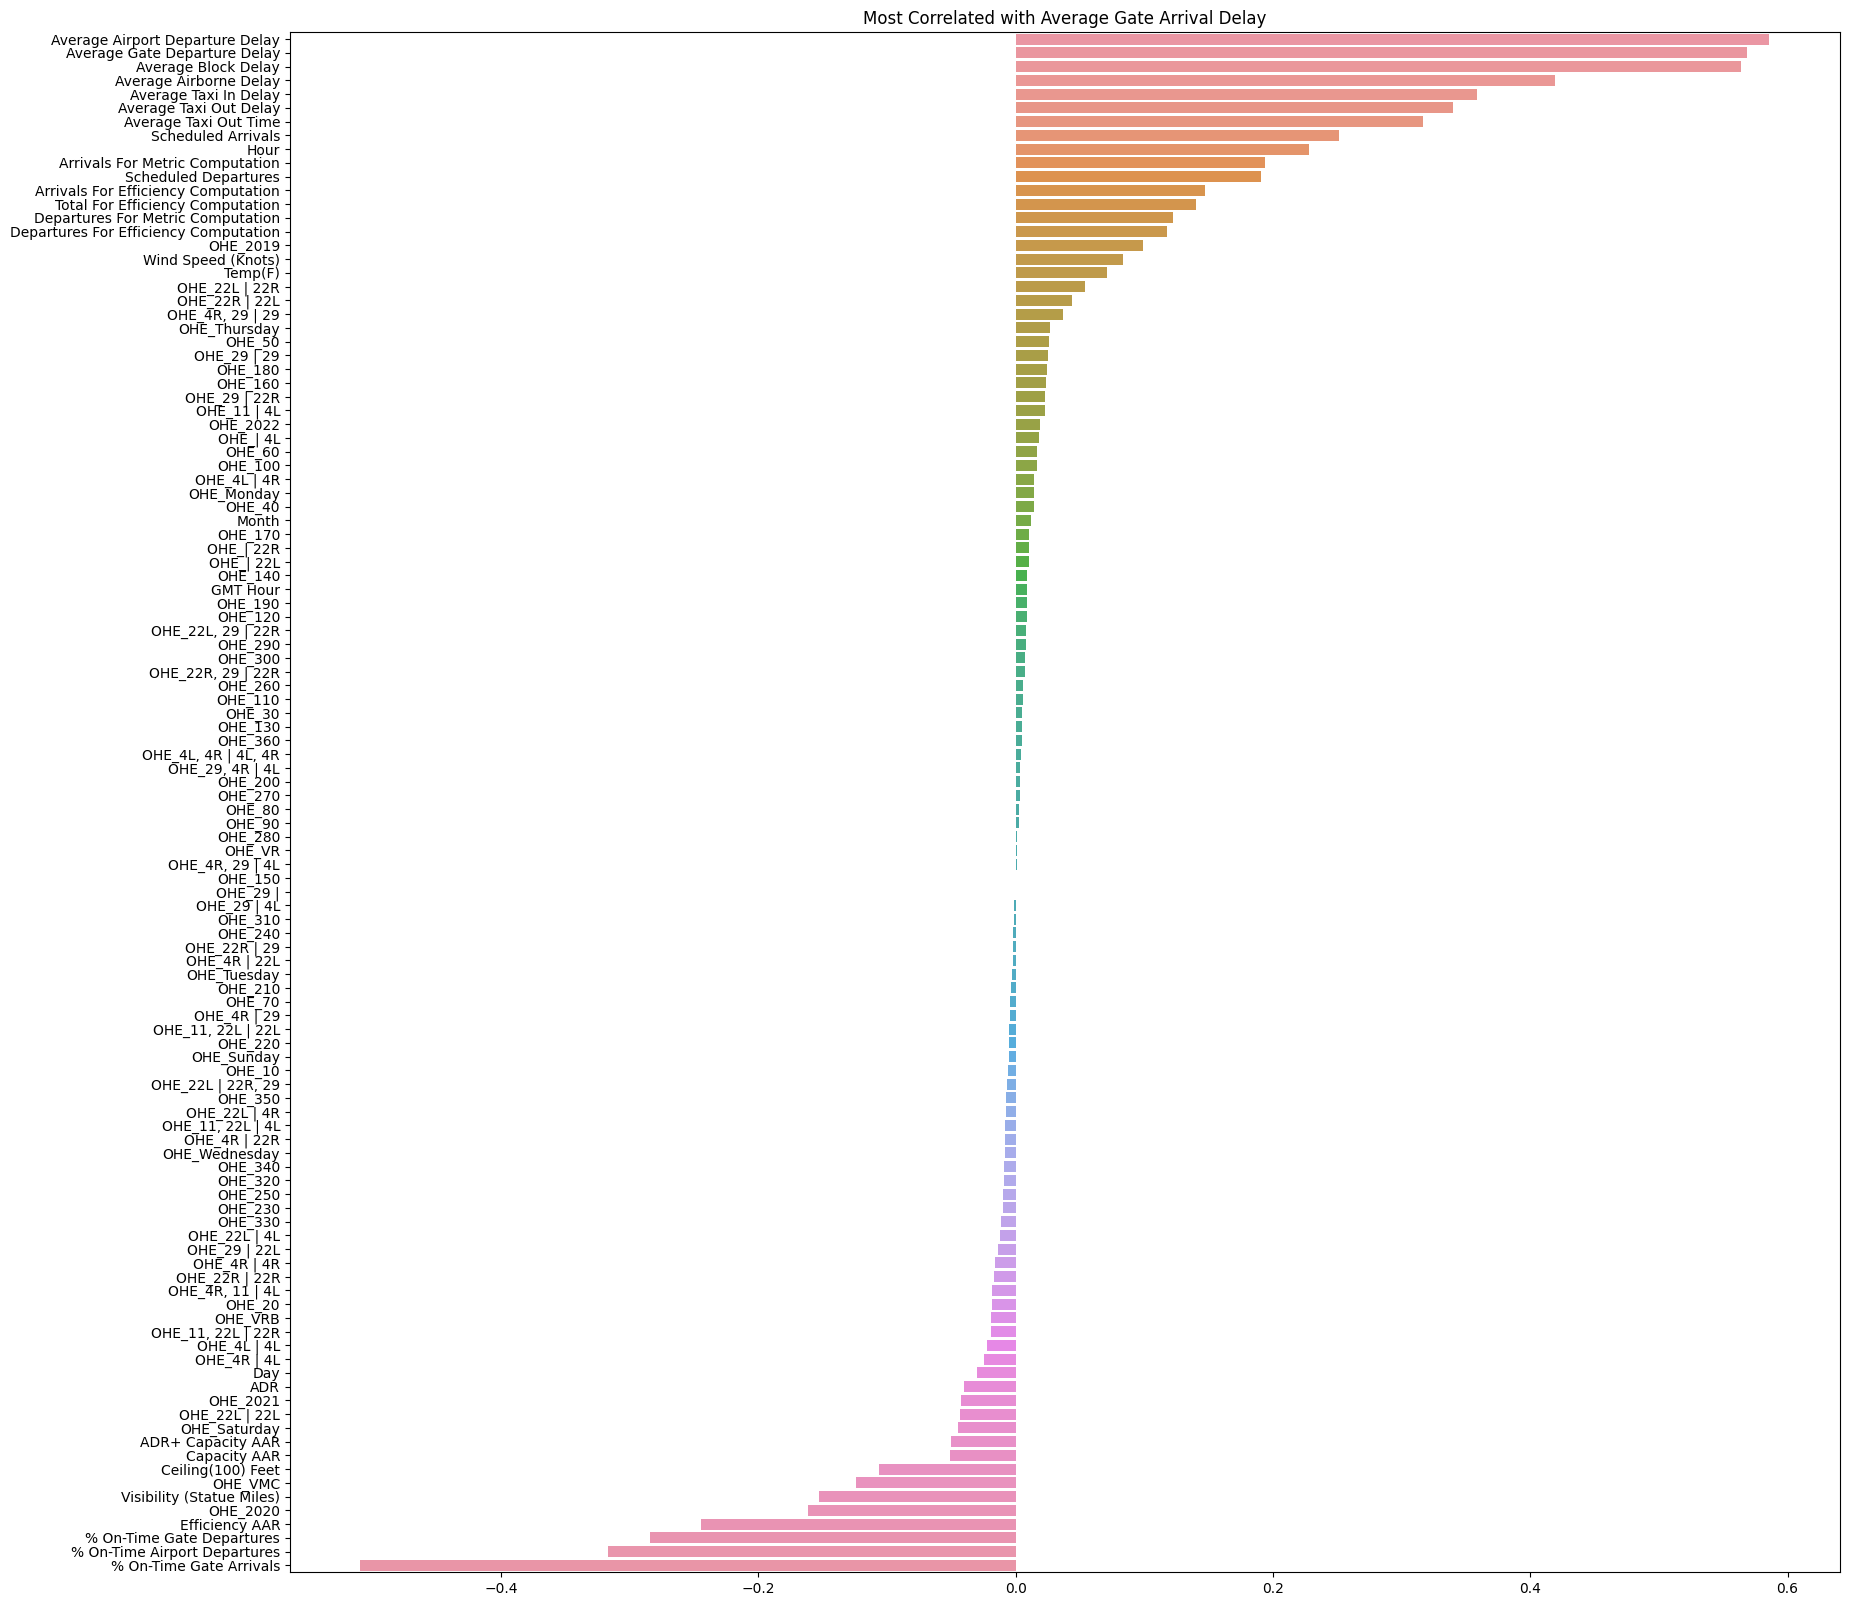

In [ ]:
plt.figure(figsize=(20, 20))
correlations =df_encode.corr()['Average Gate Arrival Delay'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Most Correlated with Average Gate Arrival Delay')

<ipython-input-43-feb2080c7a98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_encode.corr()))
<ipython-input-43-feb2080c7a98>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_encode.corr(), mask=mask)


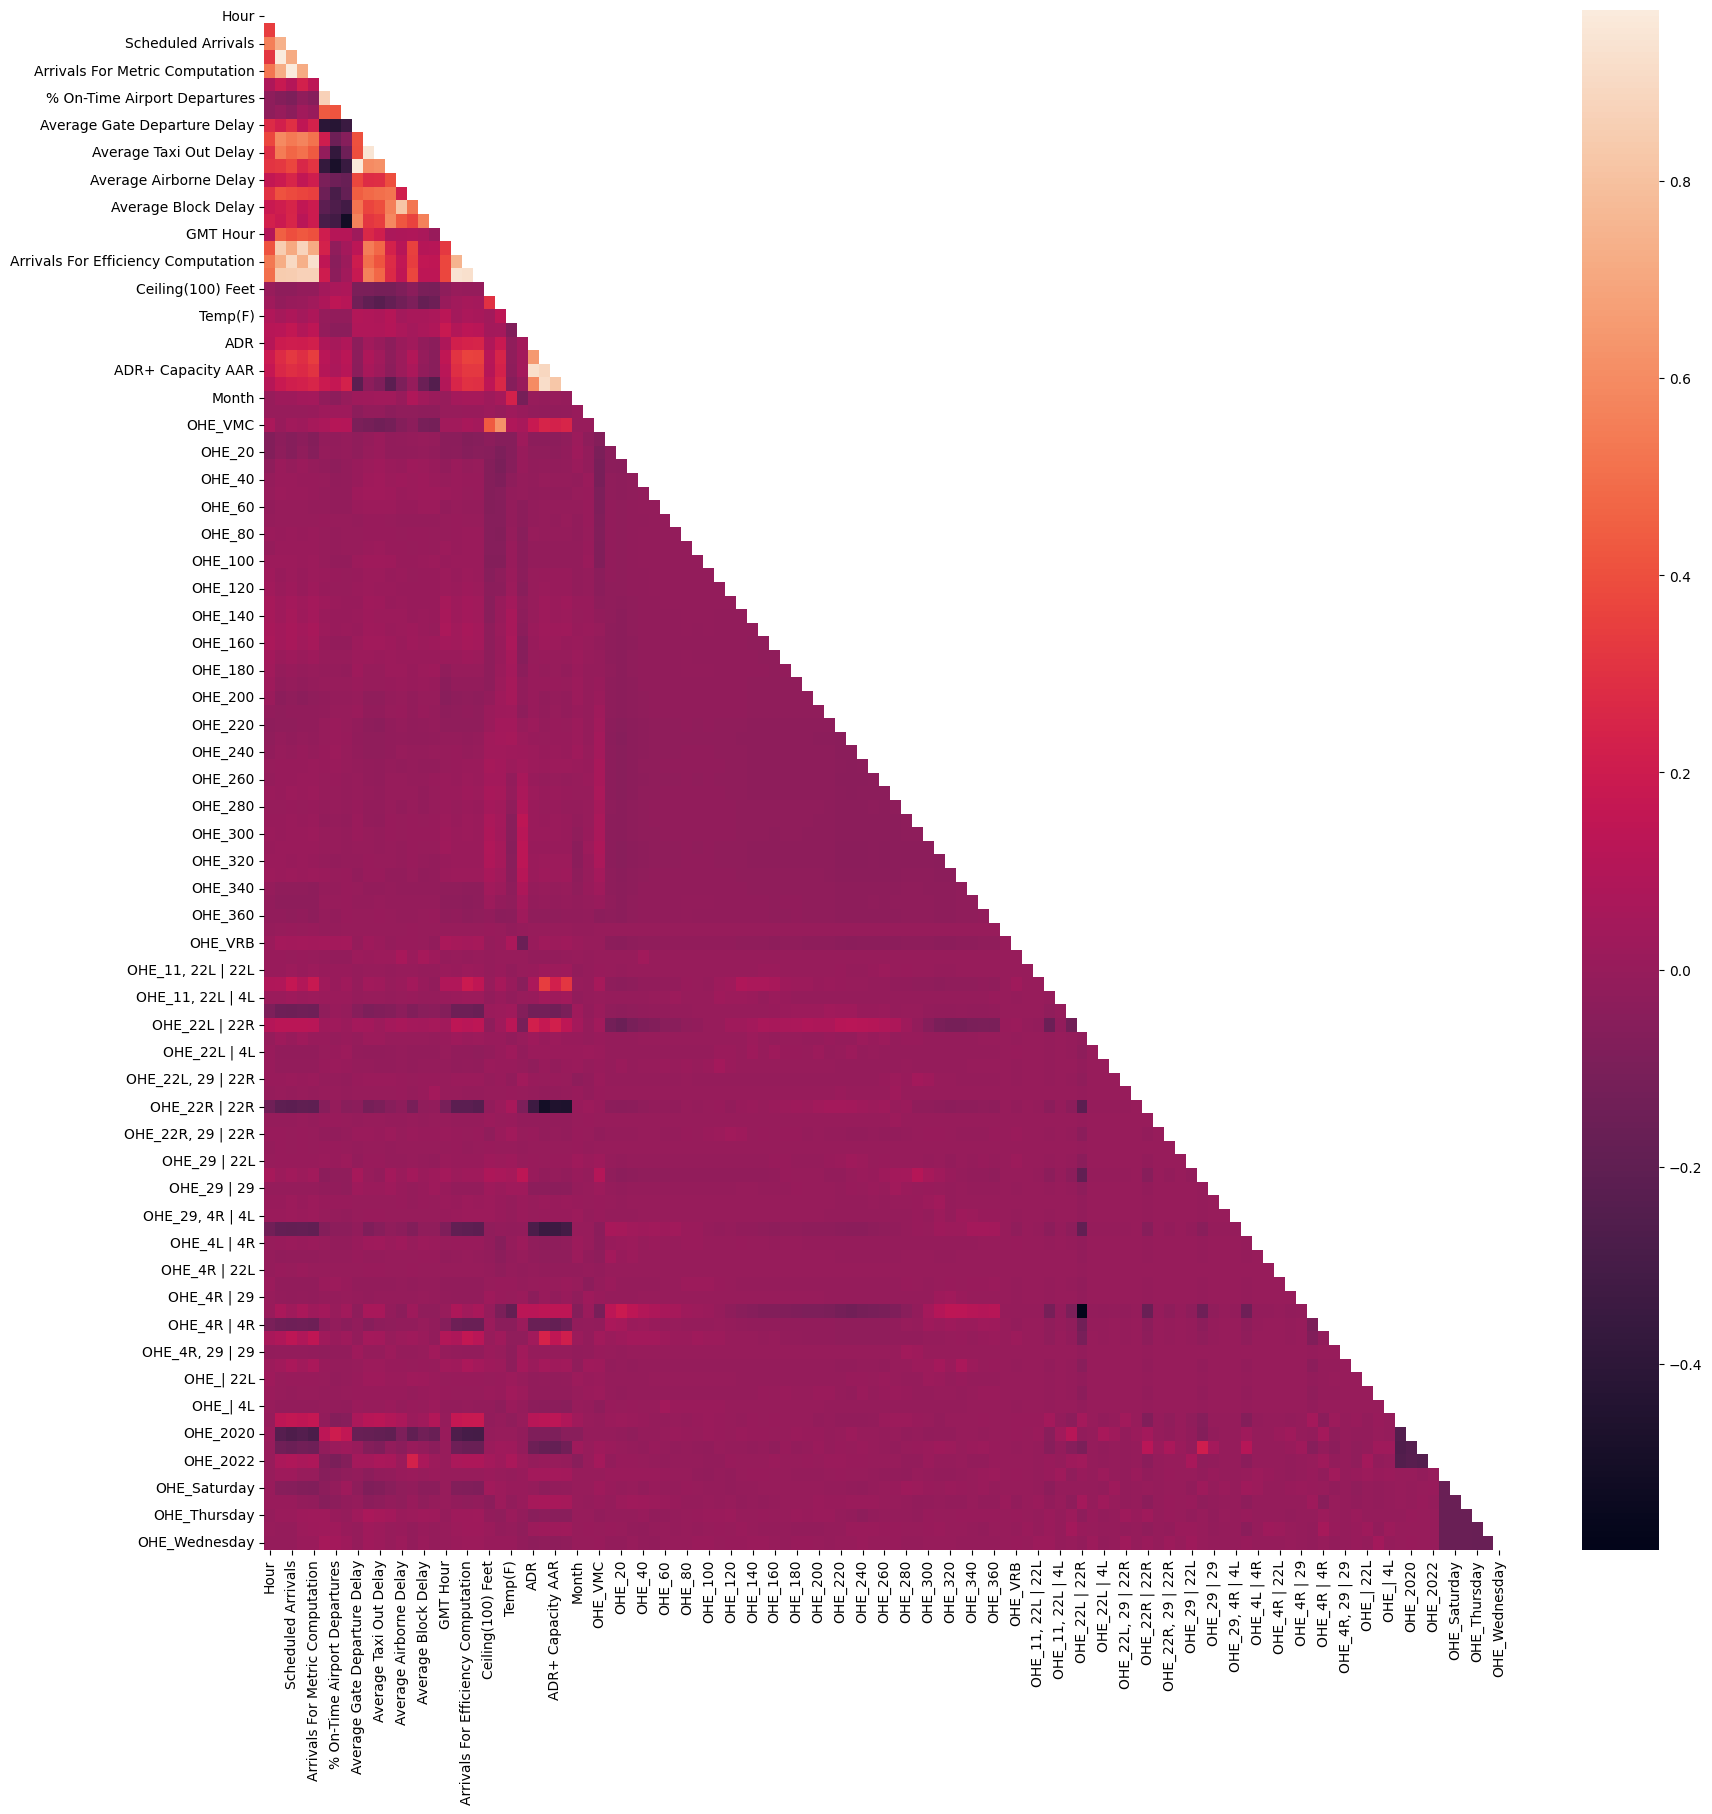

In [ ]:
import numpy as np
mask = np.triu(np.ones_like(df_encode.corr()))

plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(df_encode.corr(), mask=mask)
plt.show()

In [ ]:
df_encode.drop(columns=["Date"], inplace=True)

In [ ]:
imp_coef = pd.concat([correlations.sort_values().head(20),
                     correlations.sort_values().tail(20)])

In [ ]:
columns_corr = imp_coef.to_frame().index
columns_corr

Index(['% On-Time Gate Arrivals', '% On-Time Airport Departures',
       '% On-Time Gate Departures', 'Efficiency AAR', 'OHE_2020',
       'Visibility (Statue Miles)', 'OHE_VMC', 'Ceiling(100) Feet',
       'Capacity AAR', 'ADR+ Capacity AAR', 'OHE_Saturday', 'OHE_22L | 22L',
       'OHE_2021', 'ADR', 'Day', 'OHE_4R | 4L', 'OHE_4L | 4L',
       'OHE_11, 22L | 22R', 'OHE_VRB', 'OHE_20', 'OHE_22R | 22L',
       'OHE_22L | 22R', 'Temp(F)', 'Wind Speed (Knots)', 'OHE_2019',
       'Departures For Efficiency Computation',
       'Departures For Metric Computation', 'Total For Efficiency Computation',
       'Arrivals For Efficiency Computation', 'Scheduled Departures',
       'Arrivals For Metric Computation', 'Hour', 'Scheduled Arrivals',
       'Average Taxi Out Time', 'Average Taxi Out Delay',
       'Average Taxi In Delay', 'Average Airborne Delay',
       'Average Block Delay', 'Average Gate Departure Delay',
       'Average Airport Departure Delay'],
      dtype='object')

From this 50 Columns we will check and compare with Lasso and Ridge what will be the best features to predict our target variable **Average Gate Arrival Delay**

### Scaler

Usin MinMax Scaler since we have columns as % data types

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale_numerical(data):
    scaler = MinMaxScaler()
    data[data.columns] = scaler.fit_transform(data[data.columns])

scale_numerical(df_encode)

## Feature Importance and selection with LASSO and RIDGE

In [ ]:
#Applying Box-Cox transformation
df_encode["Average Gate Arrival Delay Transformed"] = (df_encode["Average Gate Arrival Delay"]**0.22 - 1) / 0.22

<ipython-input-48-d580fd757112>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encode["Average Gate Arrival Delay Transformed"] = (df_encode["Average Gate Arrival Delay"]**0.22 - 1) / 0.22


In [ ]:
X = df_encode.drop(columns=["Average Gate Arrival Delay","Average Gate Arrival Delay Transformed"], axis = 1)
#X = df_encode[imp_coef.to_frame().index]
y = df_encode["Average Gate Arrival Delay Transformed"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Lasso 

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [ ]:
model_lasso = LassoCV(alphas = [100,15,10,5,1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 55 variables and eliminated the other 57 variables


In [ ]:
#Selecting top 20 and bottom 20
imp_coef_lass = pd.concat([coef.sort_values().head(20),
                     coef.sort_values().tail(20)])

In [ ]:
columns_lasso = imp_coef_lass.to_frame().index
columns_lasso

Index(['Average Taxi Out Delay', 'Departures For Metric Computation',
       'Scheduled Arrivals', '% On-Time Gate Arrivals', 'Efficiency AAR',
       'OHE_2020', 'OHE_4R | 4R', 'GMT Hour', 'OHE_4R, 11 | 4L',
       'OHE_11, 22L | 22R', 'OHE_VMC', 'OHE_Wednesday', 'OHE_4L | 4L',
       'OHE_2022', 'Day', 'Visibility (Statue Miles)', 'Month',
       'OHE_22L | 22L', 'OHE_250', 'Ceiling(100) Feet', 'OHE_Saturday',
       'OHE_240', 'OHE_330', 'OHE_4R | 4L', 'OHE_2021', 'OHE_10', 'OHE_260',
       'OHE_22L | 22R', 'OHE_29 | 22R', '% On-Time Airport Departures',
       'Temp(F)', 'Arrivals For Efficiency Computation', 'Hour',
       'Total For Efficiency Computation', 'Average Taxi In Delay',
       'Scheduled Departures', 'Average Gate Departure Delay',
       'Arrivals For Metric Computation', 'Average Taxi Out Time',
       'Average Block Delay'],
      dtype='object')

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

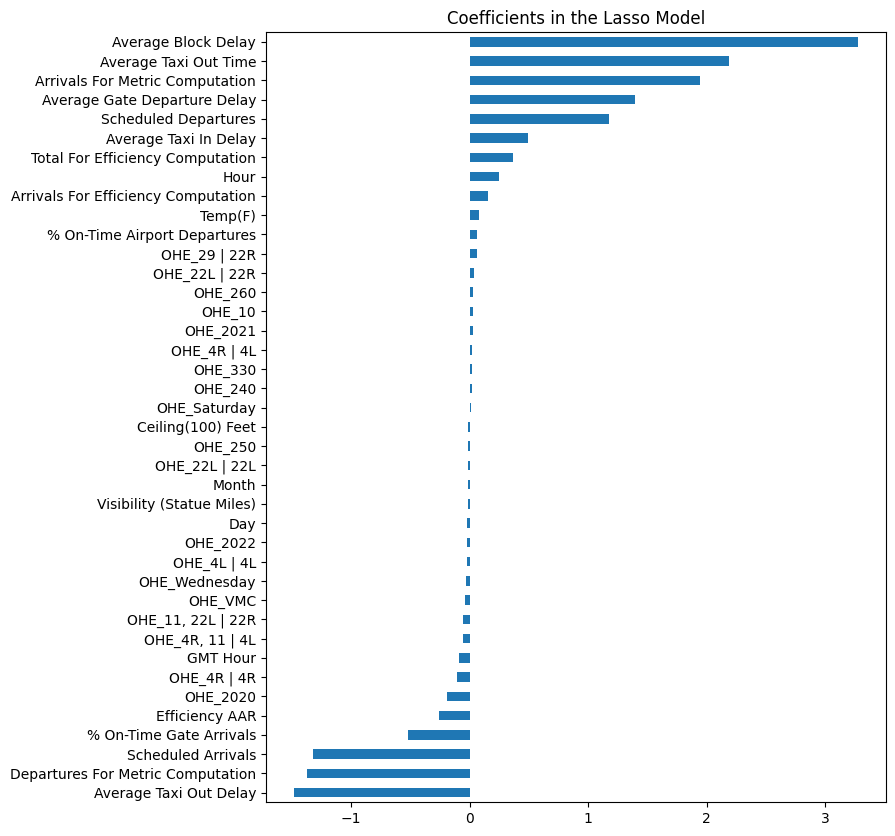

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lass.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Ridge

In [ ]:
model_ridge = RidgeCV(alphas = [100,15,10,5,1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [ ]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)

In [ ]:
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 111 variables and eliminated the other 1 variables


In [ ]:
#Selecting top 10 and bottom 10
imp_coef_rid = pd.concat([coef.sort_values().head(20),
                     coef.sort_values().tail(20)])

In [ ]:
columns_ridge = imp_coef_rid.to_frame().index
columns_ridge

Index(['Average Taxi Out Delay', 'Average Airborne Delay',
       'Departures For Metric Computation', 'Scheduled Arrivals',
       'Efficiency AAR', '% On-Time Gate Arrivals', 'OHE_11 | 4L',
       'OHE_22L, 29 | 22R', 'OHE_29 | 4L', 'OHE_4L, 4R | 4L, 4R', 'OHE_2020',
       'OHE_4R, 11 | 4L', 'OHE_4R | 4R', 'OHE_11, 22L | 4L', 'OHE_22L | 4R',
       'OHE_11, 22L | 22R', 'OHE_4R, 29 | 4L', 'GMT Hour', 'OHE_11, 22L | 22L',
       'OHE_22L | 22L', 'OHE_29 | 29', 'ADR', 'OHE_| 4L',
       'Departures For Efficiency Computation', 'OHE_22L | 4L',
       'ADR+ Capacity AAR', 'Average Taxi In Delay', 'Hour',
       'Arrivals For Efficiency Computation',
       'Total For Efficiency Computation', 'OHE_VR', 'OHE_4R | 29',
       'Average Gate Departure Delay', 'Capacity AAR', 'OHE_4R, 29 | 29',
       'OHE_22R | 22L', 'Scheduled Departures',
       'Arrivals For Metric Computation', 'Average Taxi Out Time',
       'Average Block Delay'],
      dtype='object')

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

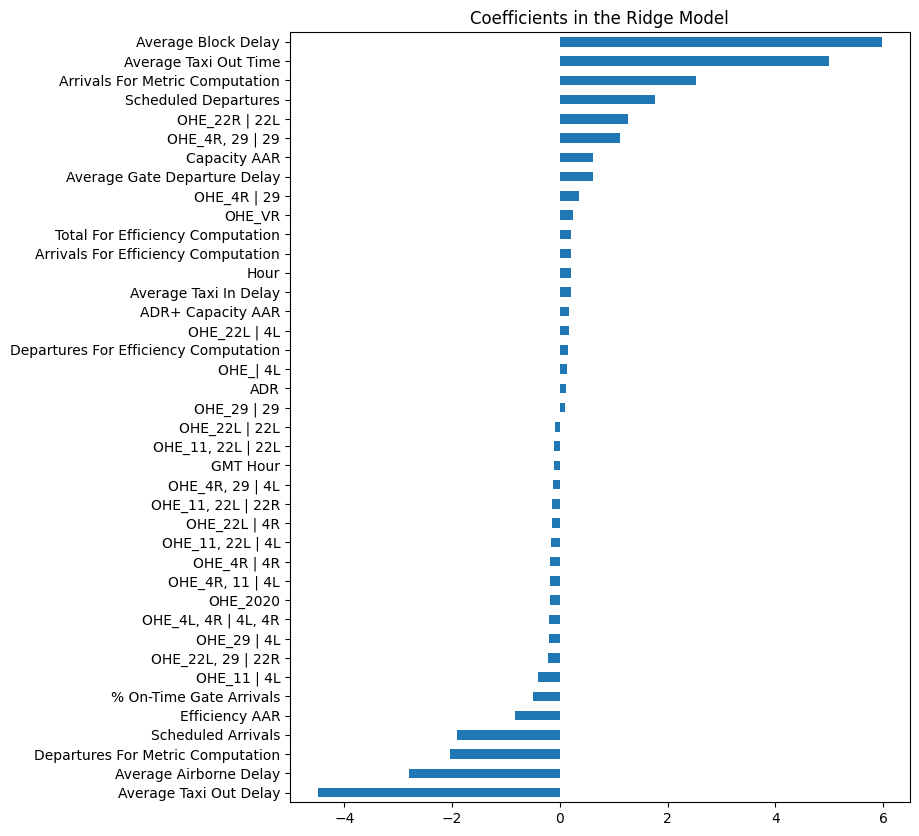

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_rid.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

In [ ]:
res =[i for i, j in zip(columns_lasso, columns_ridge) if i == j]

print(res)


['Average Taxi Out Delay', 'Efficiency AAR', 'Arrivals For Metric Computation', 'Average Taxi Out Time', 'Average Block Delay']


According to some literature, we will add also some other features like:
- Average Airbone Delay
- Departures For Metric Computation
- % On-Time Gate Arrivals
- Capacity AAR

In [ ]:
features_2 = res + ['Average Airborne Delay','Departures For Metric Computation','% On-Time Gate Arrivals', 'Capacity AAR']
features_2

['Average Taxi Out Delay',
 'Efficiency AAR',
 'Arrivals For Metric Computation',
 'Average Taxi Out Time',
 'Average Block Delay',
 'Average Airborne Delay',
 'Departures For Metric Computation',
 '% On-Time Gate Arrivals',
 'Capacity AAR']

### Hypothesis testing

#### Linear Regression using stats model 
We do a linear regression using stats model to test the null hypothesis checking the p value per each of the selected features. Also, this will be our benchmark model, basic model the other models with need to be compared to.


In [ ]:
X = df_encode[features_2]
y = df_encode["Average Gate Arrival Delay Transformed"]

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X) 
result = sm.OLS(y, X).fit()
print(result.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Average Gate Arrival Delay Transformed   R-squared:                       0.449
Model:                                                OLS   Adj. R-squared:                  0.449
Method:                                     Least Squares   F-statistic:                     3721.
Date:                                    Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                                            03:41:53   Log-Likelihood:                -32927.
No. Observations:                                   41096   AIC:                         6.587e+04
Df Residuals:                                       41086   BIC:                         6.596e+04
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
          

We reject the null hypothesis, meaning that there is a definite, consequential relationship between the features selected and our dependant feature. 

# ML Model

### First Models Basic Parameters

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MSE:",mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

models_run = [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),XGBRegressor()]
models_nam = ['Linear Regression', 'Random Forest Regressor', 'KNeighbors Regressor', 'XGBoost Regressor']

for x, i in zip(models_run, models_nam):
  print(i)
  run_experiment(x)
  print(" ")

Linear Regression
R^2 :  0.4455720942311524
MAE : 0.40101715880146854
RMSE: 0.5429815370951595
MSE: 0.294828949626222
 
Random Forest Regressor
R^2 :  0.8656807925394652
MAE : 0.18047460790168993
RMSE: 0.2672585342635952
MSE: 0.07142712413672529
 
KNeighbors Regressor
R^2 :  0.8263044965926725
MAE : 0.19976721437254558
RMSE: 0.30391827096191804
MSE: 0.09236631542448183
 
XGBoost Regressor
R^2 :  0.8714645794919511
MAE : 0.17788544622725835
RMSE: 0.26144114284495107
MSE: 0.06835147117207412
 


In [ ]:
# Now lets run these models with a cross validation 
comp = []
for mod in models_run:
    scores = cross_val_score(mod, X_train, y_train, cv=6, scoring='r2') 
    comp.append((scores.mean()))

cv_scores = pd.DataFrame(data=comp, index=models_nam, columns=['r2']).sort_values('r2', ascending=False)

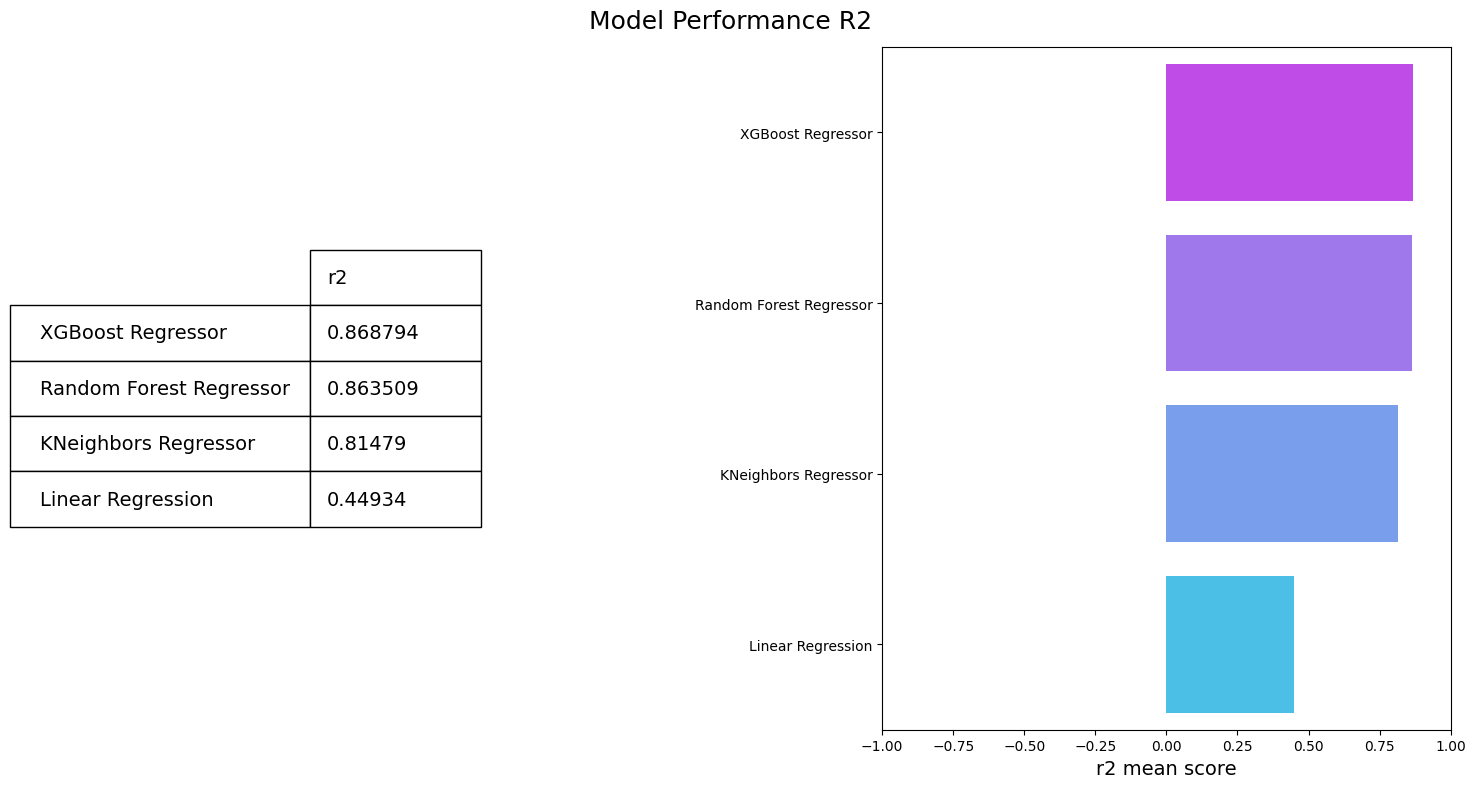

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='r2', y=cv_scores.index, data=cv_scores, orient="h", ax=ax2 , palette='cool_r')
ax2.set_xlabel('r2 mean score', fontsize=14)

plt.xlim([-1,1])
plt.suptitle('Model Performance R2', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Now lets run these models with a cross validation for RMSE
comp = []
for mod in models_run:
    scores =  np.abs(cross_val_score(mod, X_train, y_train, cv=6, scoring='neg_root_mean_squared_error'))
    comp.append((scores.mean()))

cv_scores = pd.DataFrame(data=comp, index=models_nam, columns=['neg_root_mean_squared_error']).sort_values('neg_root_mean_squared_error', ascending=True)
cv_scores = cv_scores.rename(columns={'neg_root_mean_squared_error':'RMSE'})

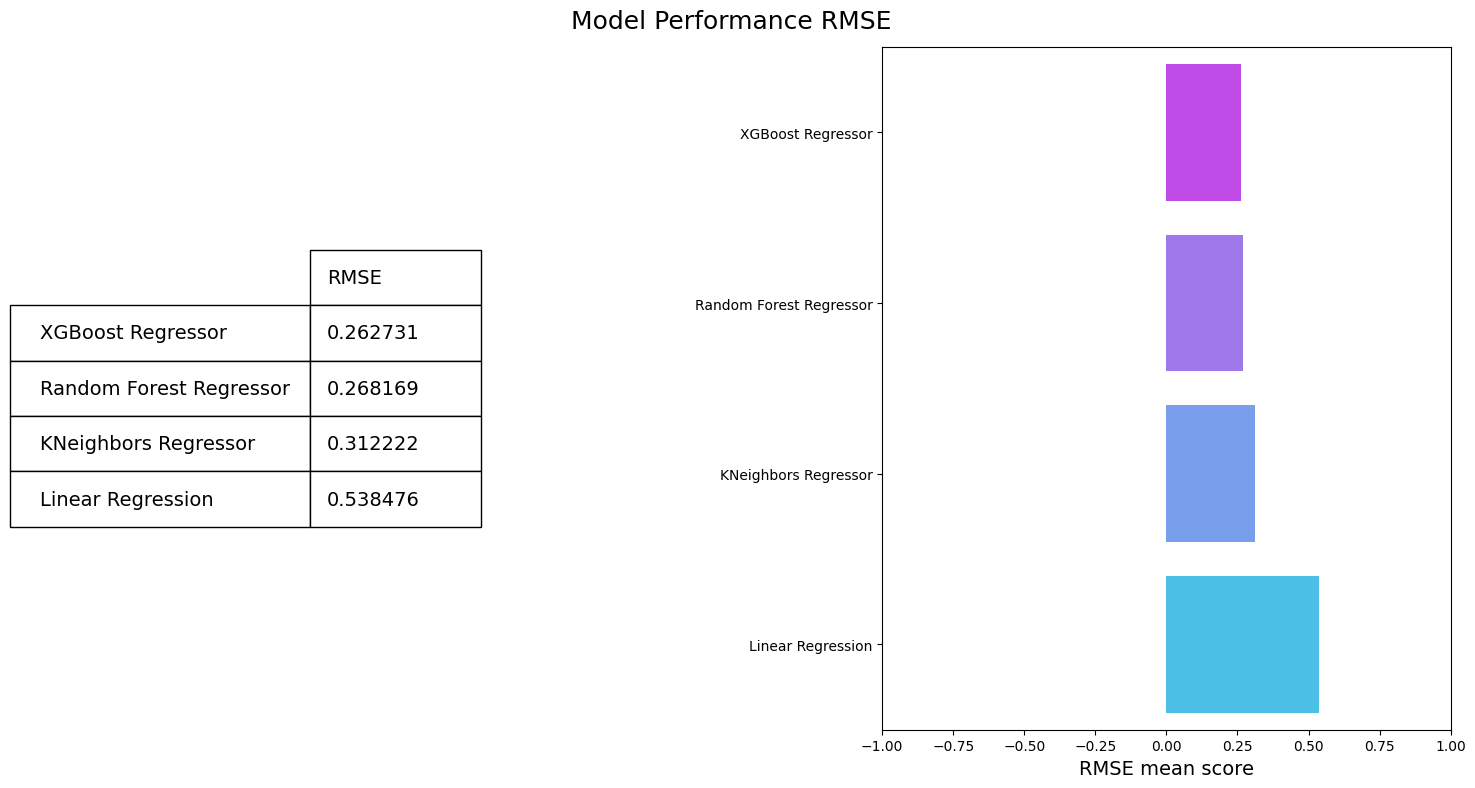

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='RMSE', y=cv_scores.index, data=cv_scores, orient="h", ax=ax2 , palette='cool_r')
ax2.set_xlabel('RMSE mean score', fontsize=14)

plt.xlim([-1,1])
plt.suptitle('Model Performance RMSE', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Now lets run these models with a cross validation for RMSE
comp = []
for mod in models_run:
    scores =  np.abs(cross_val_score(mod, X_train, y_train, cv=6, scoring='neg_mean_squared_error'))
    comp.append((scores.mean()))

cv_scores = pd.DataFrame(data=comp, index=models_nam, columns=['neg_mean_squared_error']).sort_values('neg_mean_squared_error', ascending=True)
cv_scores = cv_scores.rename(columns={'neg_mean_squared_error':'MSE'})

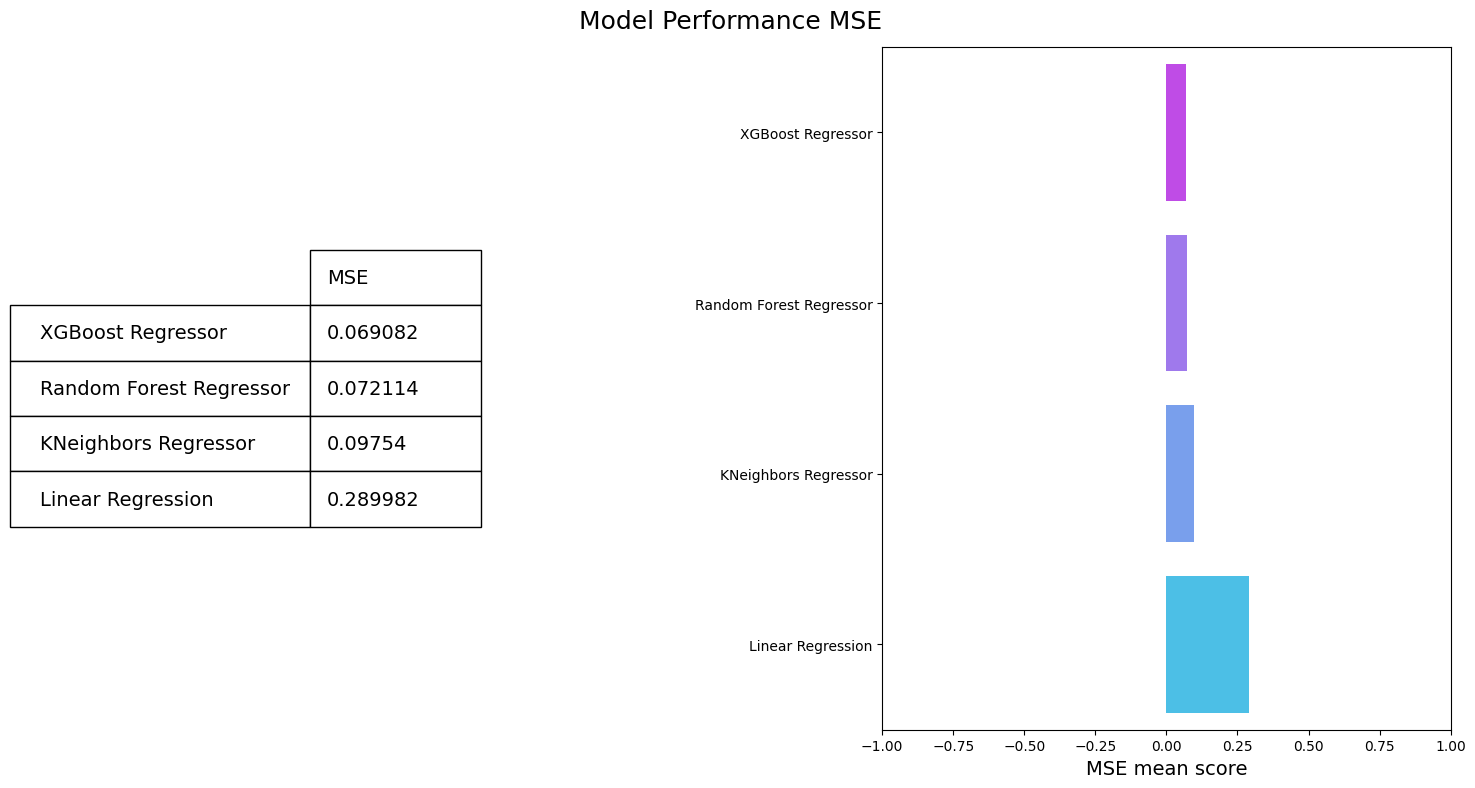

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='MSE', y=cv_scores.index, data=cv_scores, orient="h", ax=ax2 , palette='cool_r')
ax2.set_xlabel('MSE mean score', fontsize=14)

plt.xlim([-1,1])
plt.suptitle('Model Performance MSE', fontsize=18)
plt.tight_layout()
plt.show()

### GridSearch for best parameter per Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data,
                       model, param_grid, scoring_fit='r2',
                       scoring_test=r2_score, do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        n_jobs=-1,
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    best_prams = fitted_model.best_params_


    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)

    score = scoring_test(y_test_data, pred)

    return [best_model, pred, score, best_prams]

In [ ]:
models_to_train = [XGBRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
# Defining the hyperparameters to optimize
grid_parameters = [
    { # XGBoost
        'n_estimators': [100, 500, 1000],
        'max_depth': [15,20,25]
    },
    { # Random Forest
        'max_depth':[3, 10,15],
        'n_estimators':[100, 300, 500],
        'max_features':[2, 10,20]
    },
    { # KN Regresor
        'n_neighbors':[5, 10,15],
        'leaf_size':[10, 30, 50]
    },
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    params = grid_parameters[i]

    result = algorithm_pipeline(X_train, X_test, y_train, y_test,
                                 model, params)
    models_preds_scores.append(result)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}, best_params: {2}'.format(type(result[0]).__name__, result[2],result[3]))

Model: XGBRegressor, Score: 0.8491472004289099, best_params: {'max_depth': 15, 'n_estimators': 100}
Model: RandomForestRegressor, Score: 0.8745023687314954, best_params: {'max_depth': 10, 'max_features': 20, 'n_estimators': 500}
Model: KNeighborsRegressor, Score: 0.8290825592987427, best_params: {'leaf_size': 30, 'n_neighbors': 10}


### Best Params models

In [ ]:
models_run = [LinearRegression(),RandomForestRegressor(n_estimators=500,max_depth=10,max_features=10),KNeighborsRegressor(leaf_size=30,n_neighbors=10),XGBRegressor(max_depth=15,n_estimators=100)]
models_nam = ['Linear Regression', 'Random Forest Regressor', 'KNeighbors Regressor', 'XGBoost Regressor']

In [ ]:
for x, i in zip(models_run, models_nam):
  print(i)
  run_experiment(x)
  print(" ")

Linear Regression
R^2 :  0.4455720942311524
MAE : 0.40101715880146854
RMSE: 0.5429815370951595
MSE: 0.294828949626222
 
Random Forest Regressor
R^2 :  0.8748379598566445
MAE : 0.1761998600457276
RMSE: 0.2579876037585293
MSE: 0.06655760369306792
 
KNeighbors Regressor
R^2 :  0.8290825592987427
MAE : 0.19753365233575096
RMSE: 0.3014780603951365
MSE: 0.09088902089961359
 
XGBoost Regressor
R^2 :  0.8491472004289099
MAE : 0.18882230731050895
RMSE: 0.2832299718099195
MSE: 0.0802192169314478
 


#### R2

In [ ]:
# Now lets run these models with a cross validation 
comp = []
for mod in models_run:
    scores = cross_val_score(mod, X_train, y_train, cv=6, scoring='r2') 
    comp.append((scores.mean()))

cv_scores = pd.DataFrame(data=comp, index=models_nam, columns=['r2']).sort_values('r2', ascending=False)

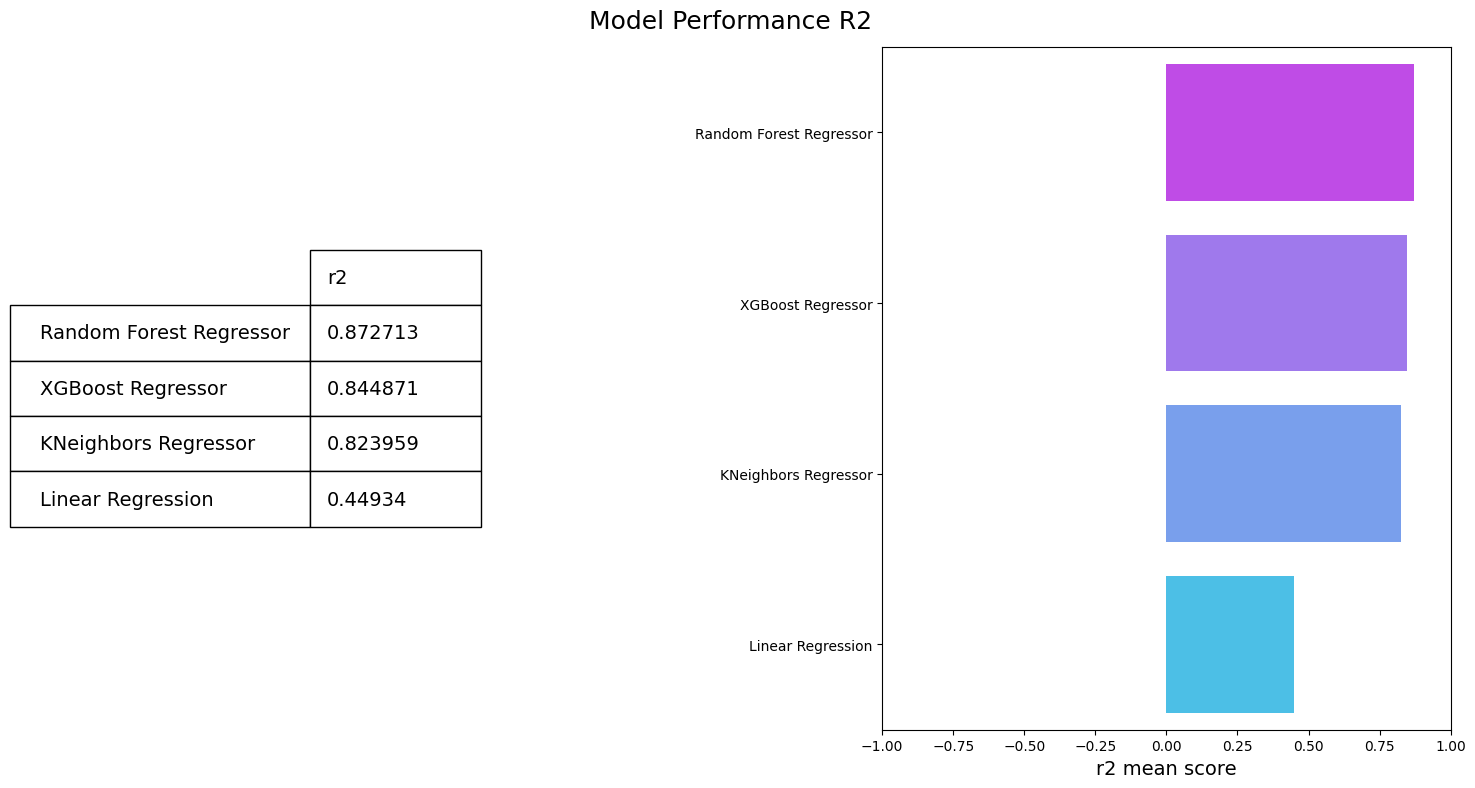

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='r2', y=cv_scores.index, data=cv_scores, orient="h", ax=ax2 , palette='cool_r')
ax2.set_xlabel('r2 mean score', fontsize=14)

plt.xlim([-1,1])
plt.suptitle('Model Performance R2', fontsize=18)
plt.tight_layout()
plt.show()

#### MSE

In [ ]:
# Now lets run these models with a cross validation 
comp = []
for mod in models_run:
    scores =  np.abs(cross_val_score(mod, X_train, y_train, cv=6, scoring='neg_mean_squared_error'))
    comp.append((scores.mean()))

cv_scores = pd.DataFrame(data=comp, index=models_nam, columns=['neg_mean_squared_error']).sort_values('neg_mean_squared_error', ascending=True)
cv_scores = cv_scores.rename(columns={'neg_mean_squared_error':'MSE'})

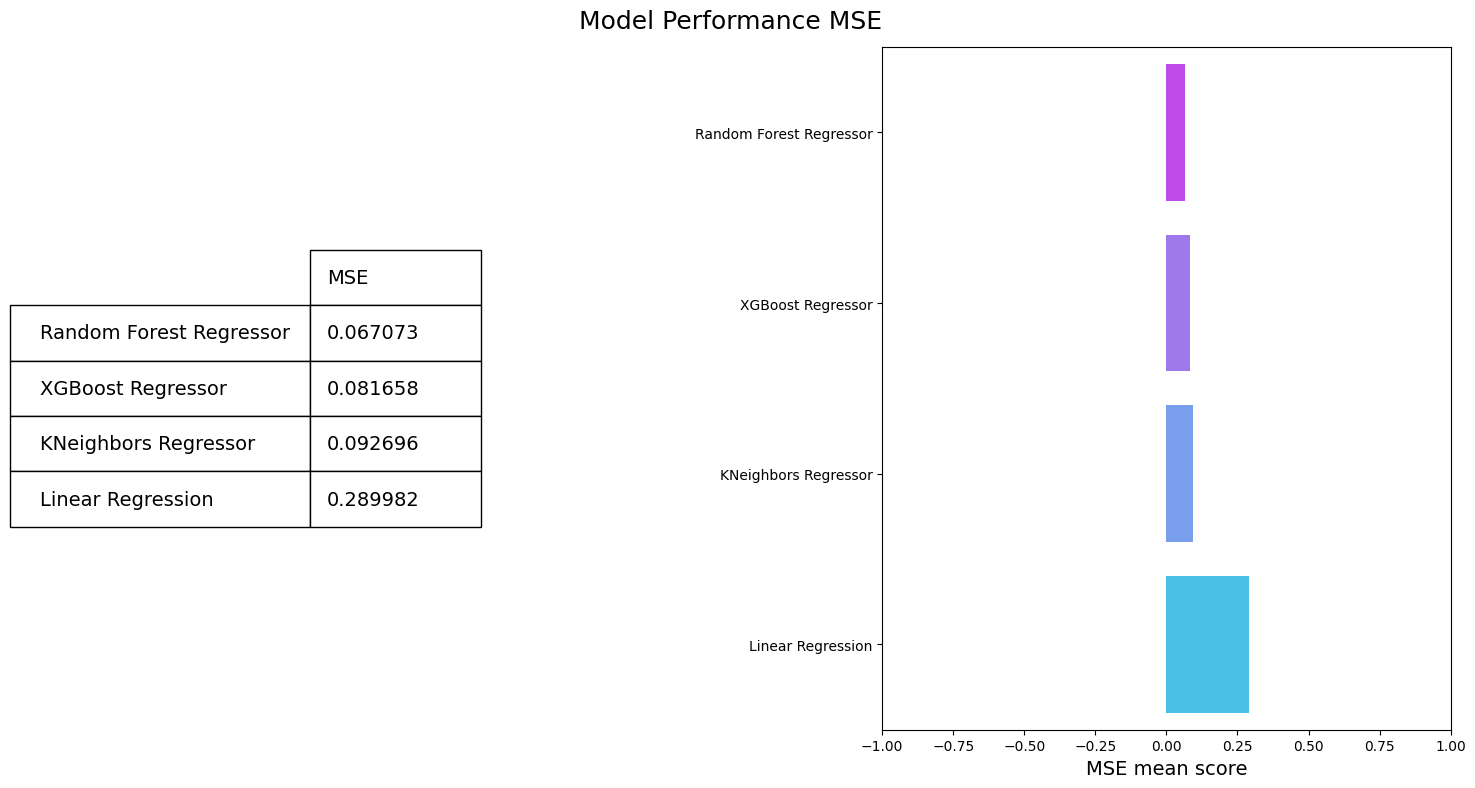

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='MSE', y=cv_scores.index, data=cv_scores, orient="h", ax=ax2 , palette='cool_r')
ax2.set_xlabel('MSE mean score', fontsize=14)

plt.xlim([-1,1])
plt.suptitle('Model Performance MSE', fontsize=18)
plt.tight_layout()
plt.show()

#### RMSE

In [ ]:
# Now lets run these models with a cross validation 
comp = []
for mod in models_run:
    scores =  np.abs(cross_val_score(mod, X_train, y_train, cv=6, scoring='neg_root_mean_squared_error'))
    comp.append((scores.mean()))

cv_scores = pd.DataFrame(data=comp, index=models_nam, columns=['neg_root_mean_squared_error']).sort_values('neg_root_mean_squared_error', ascending=True)
cv_scores = cv_scores.rename(columns={'neg_root_mean_squared_error':'RMSE'})

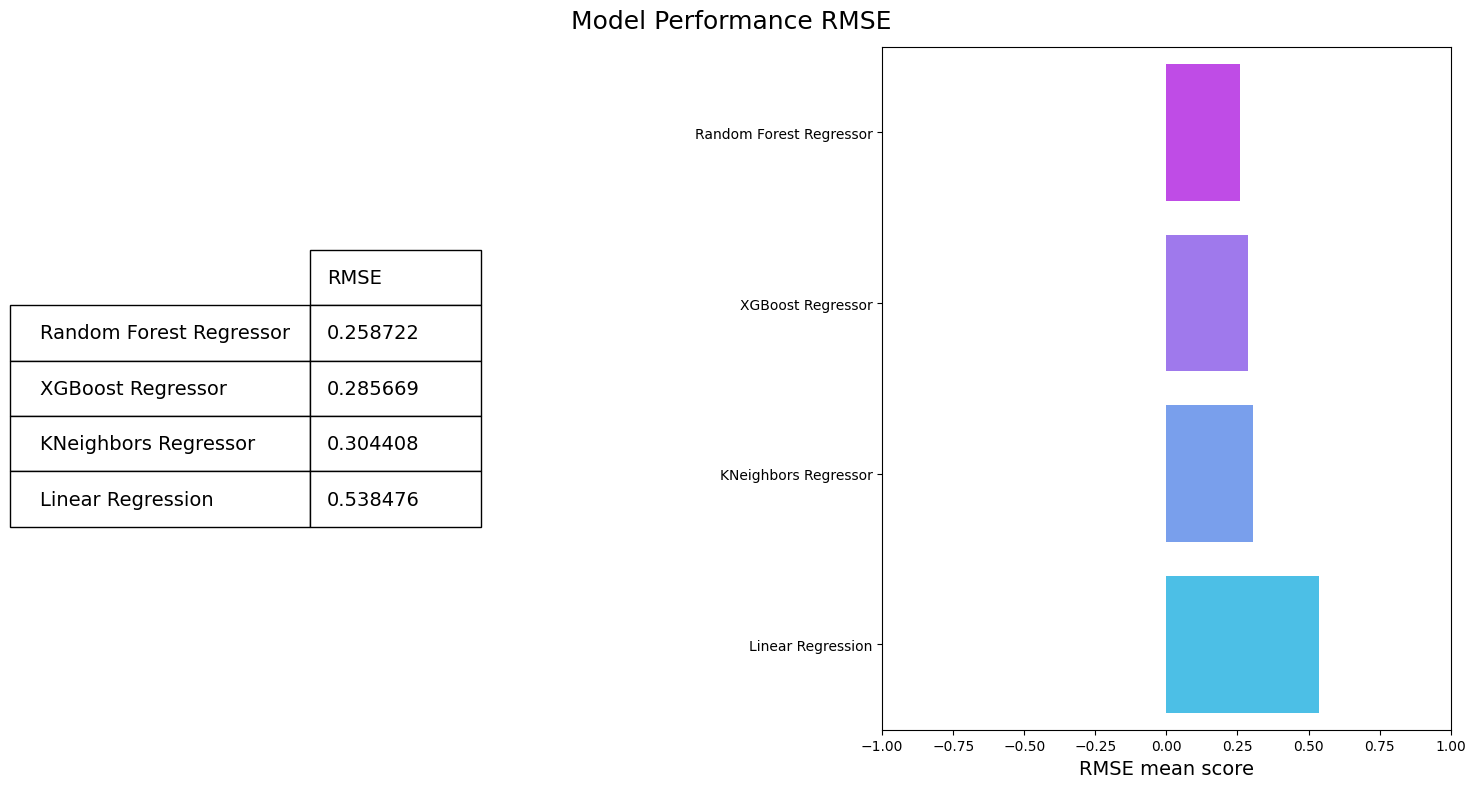

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='RMSE', y=cv_scores.index, data=cv_scores, orient="h", ax=ax2 , palette='cool_r')
ax2.set_xlabel('RMSE mean score', fontsize=14)

plt.xlim([-1,1])
plt.suptitle('Model Performance RMSE', fontsize=18)
plt.tight_layout()
plt.show()

### Random Forest Feature Importance 

In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)
  
  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
  
  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  
  #Define size of bar plot
  plt.figure(figsize=(30,30))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

  #Add chart labels
  
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

R^2 :  0.8707049351519887


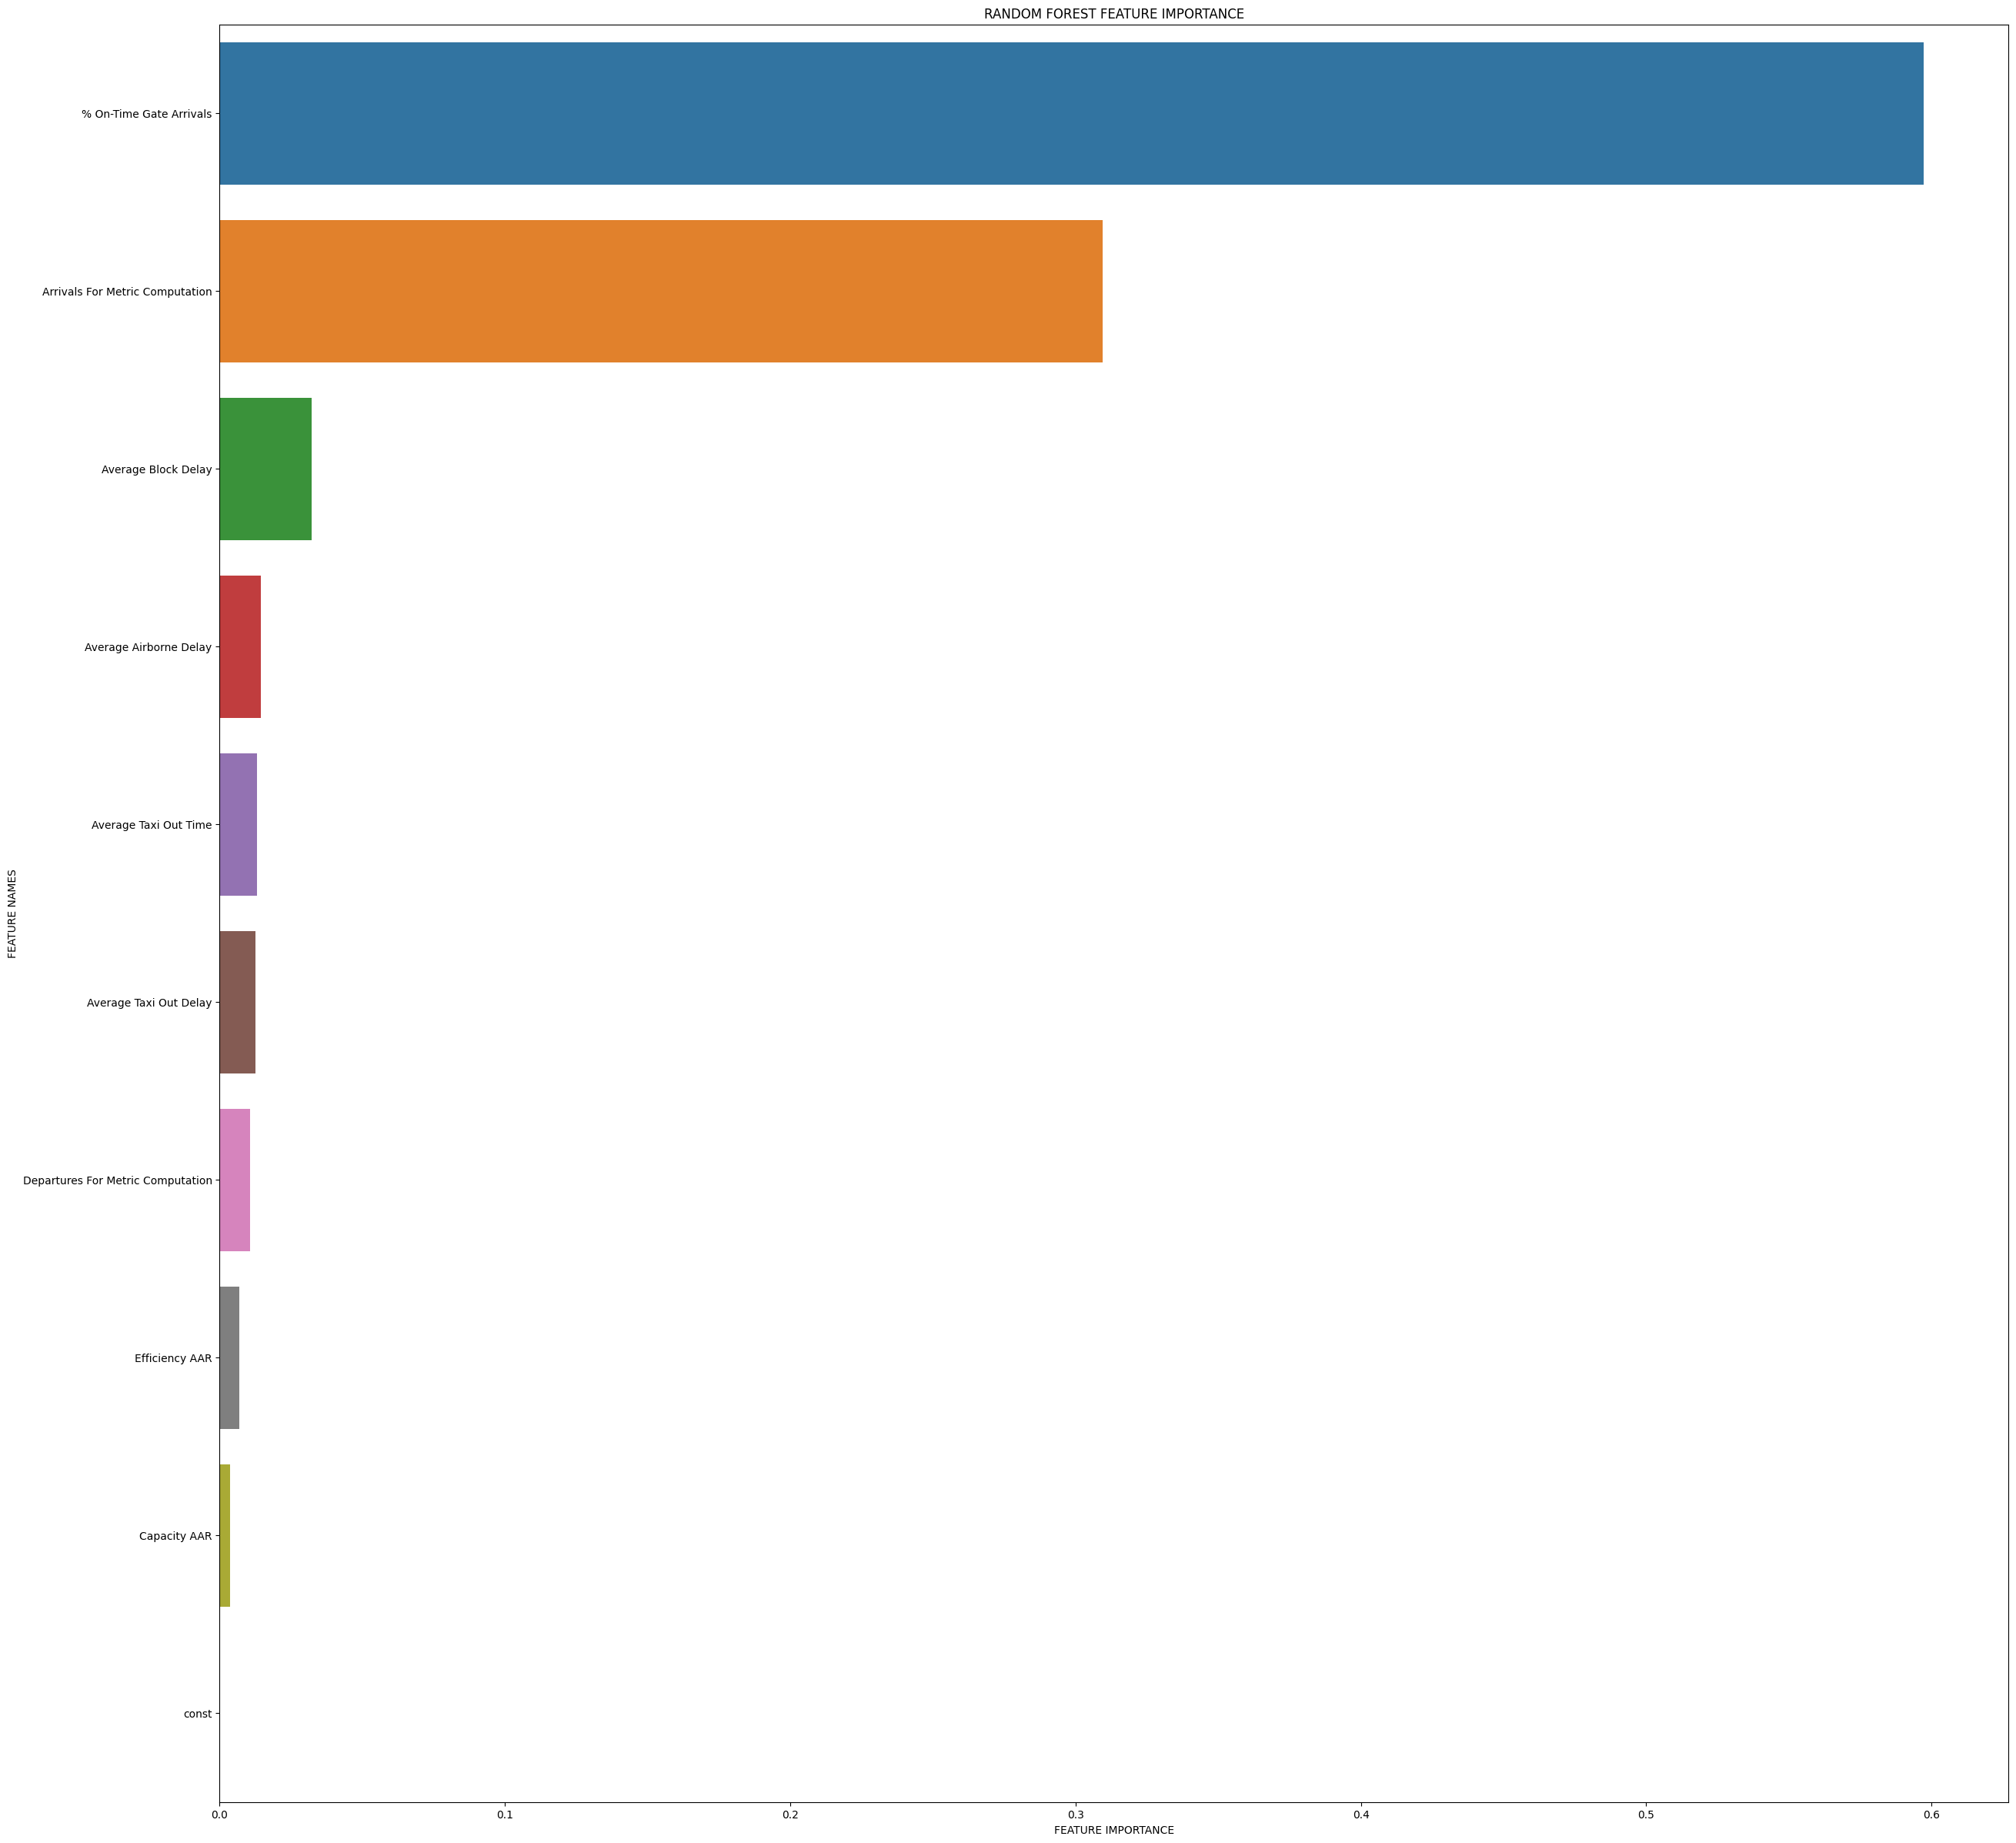

In [ ]:
#Random Forest Feature Importance
randF = RandomForestRegressor(n_estimators=500,max_depth=15,max_features=20)
randF.fit(X_train, y_train)

y_pred = randF.predict(X_test)
print("R^2 : ", r2_score(y_test, y_pred))

plot_feature_importance(randF.feature_importances_,X.columns,'RANDOM FOREST ')

## Neural Networks

We will use a sequential regressor Neural Network, we would do a standard neural network with two hidden layers. 

In [ ]:
display(X_train.shape)
display(y_train.shape)

(32876, 10)

(32876,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=5, input_dim=10, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
 
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train ,batch_size = 20, epochs = 50, validation_split = 0.2,verbose=1)

Epoch 1/50
1315/1315 [==============================] - 11s 7ms/step - loss: 1.8777 - mse: 1.8777 - mae: 0.9253 - val_loss: 0.3879 - val_mse: 0.3879 - val_mae: 0.4405
Epoch 2/50
1315/1315 [==============================] - 4s 3ms/step - loss: 0.3462 - mse: 0.3462 - mae: 0.4263 - val_loss: 0.3133 - val_mse: 0.3133 - val_mae: 0.4121
Epoch 3/50
1315/1315 [==============================] - 3s 2ms/step - loss: 0.2953 - mse: 0.2953 - mae: 0.3991 - val_loss: 0.2711 - val_mse: 0.2711 - val_mae: 0.3857
Epoch 4/50
1315/1315 [==============================] - 3s 2ms/step - loss: 0.2630 - mse: 0.2630 - mae: 0.3767 - val_loss: 0.2446 - val_mse: 0.2446 - val_mae: 0.3604
Epoch 5/50
1315/1315 [==============================] - 3s 2ms/step - loss: 0.2374 - mse: 0.2374 - mae: 0.3526 - val_loss: 0.2182 - val_mse: 0.2182 - val_mae: 0.3356
Epoch 6/50
1315/1315 [==============================] - 4s 3ms/step - loss: 0.2157 - mse: 0.2157 - mae: 0.3296 - val_loss: 0.1986 - val_mse: 0.1986 - val_mae: 0.3131
Epo

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%capture
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mse       mae  val_loss   val_mse   val_mae  epoch
45  0.128566  0.128566  0.248162  0.127590  0.127590  0.242743     45
46  0.128156  0.128156  0.247131  0.127813  0.127813  0.247292     46
47  0.127803  0.127803  0.247365  0.132615  0.132615  0.259536     47
48  0.127580  0.127580  0.246328  0.125792  0.125792  0.245594     48
49  0.126982  0.126982  0.246098  0.127001  0.127001  0.240150     49

Text(0, 0.5, 'MSE [MPG^2]')

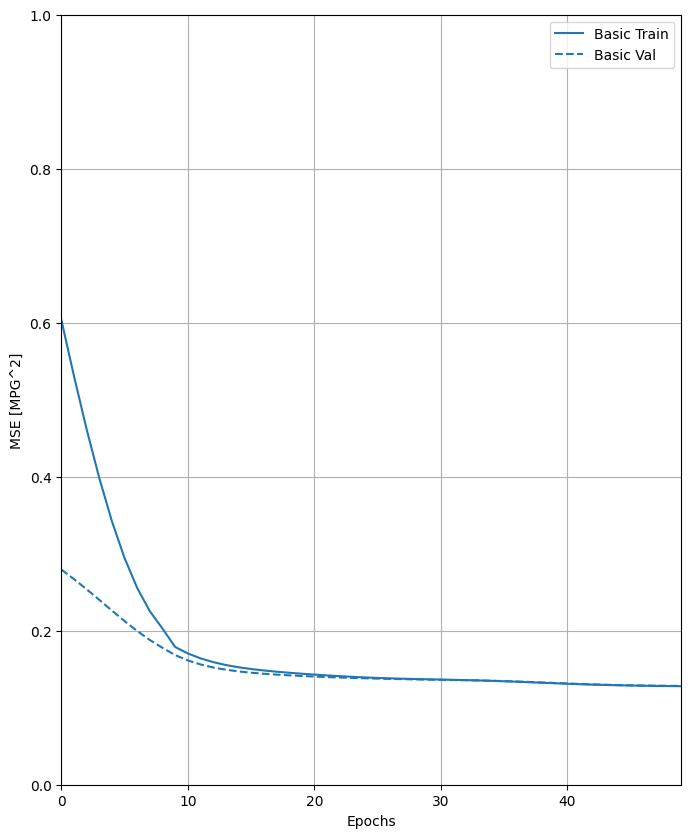

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1])
plt.ylabel('MSE [MPG^2]')